In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import re
import requests  # for API calls
import time
import missingno as msno


# Data Understanding

In [27]:
# Load the dataset
original_data = pd.read_csv('Data_202425.csv')

# Create a copy
data = original_data.copy()

# Convert date columns to datetime
data['ico_start'] = pd.to_datetime(data['ico_start'], format='%d/%m/%Y', errors='coerce')
data['ico_end'] = pd.to_datetime(data['ico_end'], format='%d/%m/%Y', errors='coerce')

# Display the first few rows of the dataset
data.head()


,country,ico_start,ico_end,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,...,pre_ico_end,pre_ico_price_usd,accepting,link_white_paper,linkedin_link,github_link,website,rating,teamsize,ERC20
0,India,2020-08-10,2020-12-31,0.01,Y,0.5,1.00E+08,500000000.0,Yes,1.0,...,NaN,5.00E-03,"BTC, ETH, and Fiat currency",NaN,https://www.linkedin.com/company/bitfinex-limi...,NaN,NaN,4.0,NaN,1.0
1,Cyprus,2020-08-01,2020-12-31,0.1,N,0.6,NaN,84000000.0,No,1.0,...,31/10/2019,NaN,"ETH, BTC",https://www.tycoon.io/whitepaper.pdf,https://www.linkedin.com/company/tycoonio/about/,https://www.github.com/tycoon?tab=repositories,https://www.tycoon.io?utm_source=icobench,4.8,14.0,1.0
2,UK,2019-03-01,2020-12-31,0.14,Y,0.5,NaN,75000000.0,No,0.0,...,15/01/2019,NaN,"ETH, BTC, LTC",https://mindsync.ai/docs/whitepaper.pdf,https://www.linkedin.com/company/mindsync/,NaN,NaN,4.5,14.0,1.0
3,UK,2020-06-25,2021-01-31,0.1,N,0.5,NaN,500000000.0,Yes,1.0,...,NaN,0.1,"BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS",https://cdn.pointpay.io/WhitePaper__en.pdf?cac...,https://www.linkedin.com/company/pointpay/about/,NaN,NaN,4.7,43.0,1.0
4,Seychelles,NaT,NaT,0.06,N,0.4,NaN,400000000.0,Yes,1.0,...,NaN,0.03,ETH,https://lohncontrol.com/down/LOHN-white-paper-...,https://www.linkedin.com/showcase/lohncontrol,https://www.github.com/lohn7?tab=repositories,https://lohncontrol.com?utm_source=icobench,4.4,16.0,1.0


## EDA

C:\Users\luish\AppData\Local\Temp\ipykernel_20208\1945686915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='success', palette='Set2')


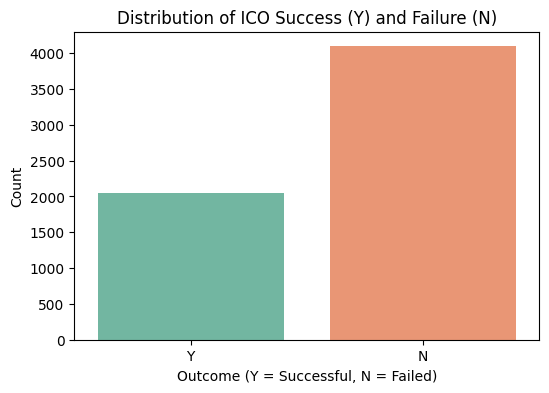

In [28]:
# Plot the distribution of the "Outcome of the ICO"
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='success', palette='Set2')
plt.title('Distribution of ICO Success (Y) and Failure (N)')
plt.xlabel('Outcome (Y = Successful, N = Failed)')
plt.ylabel('Count')
plt.show()


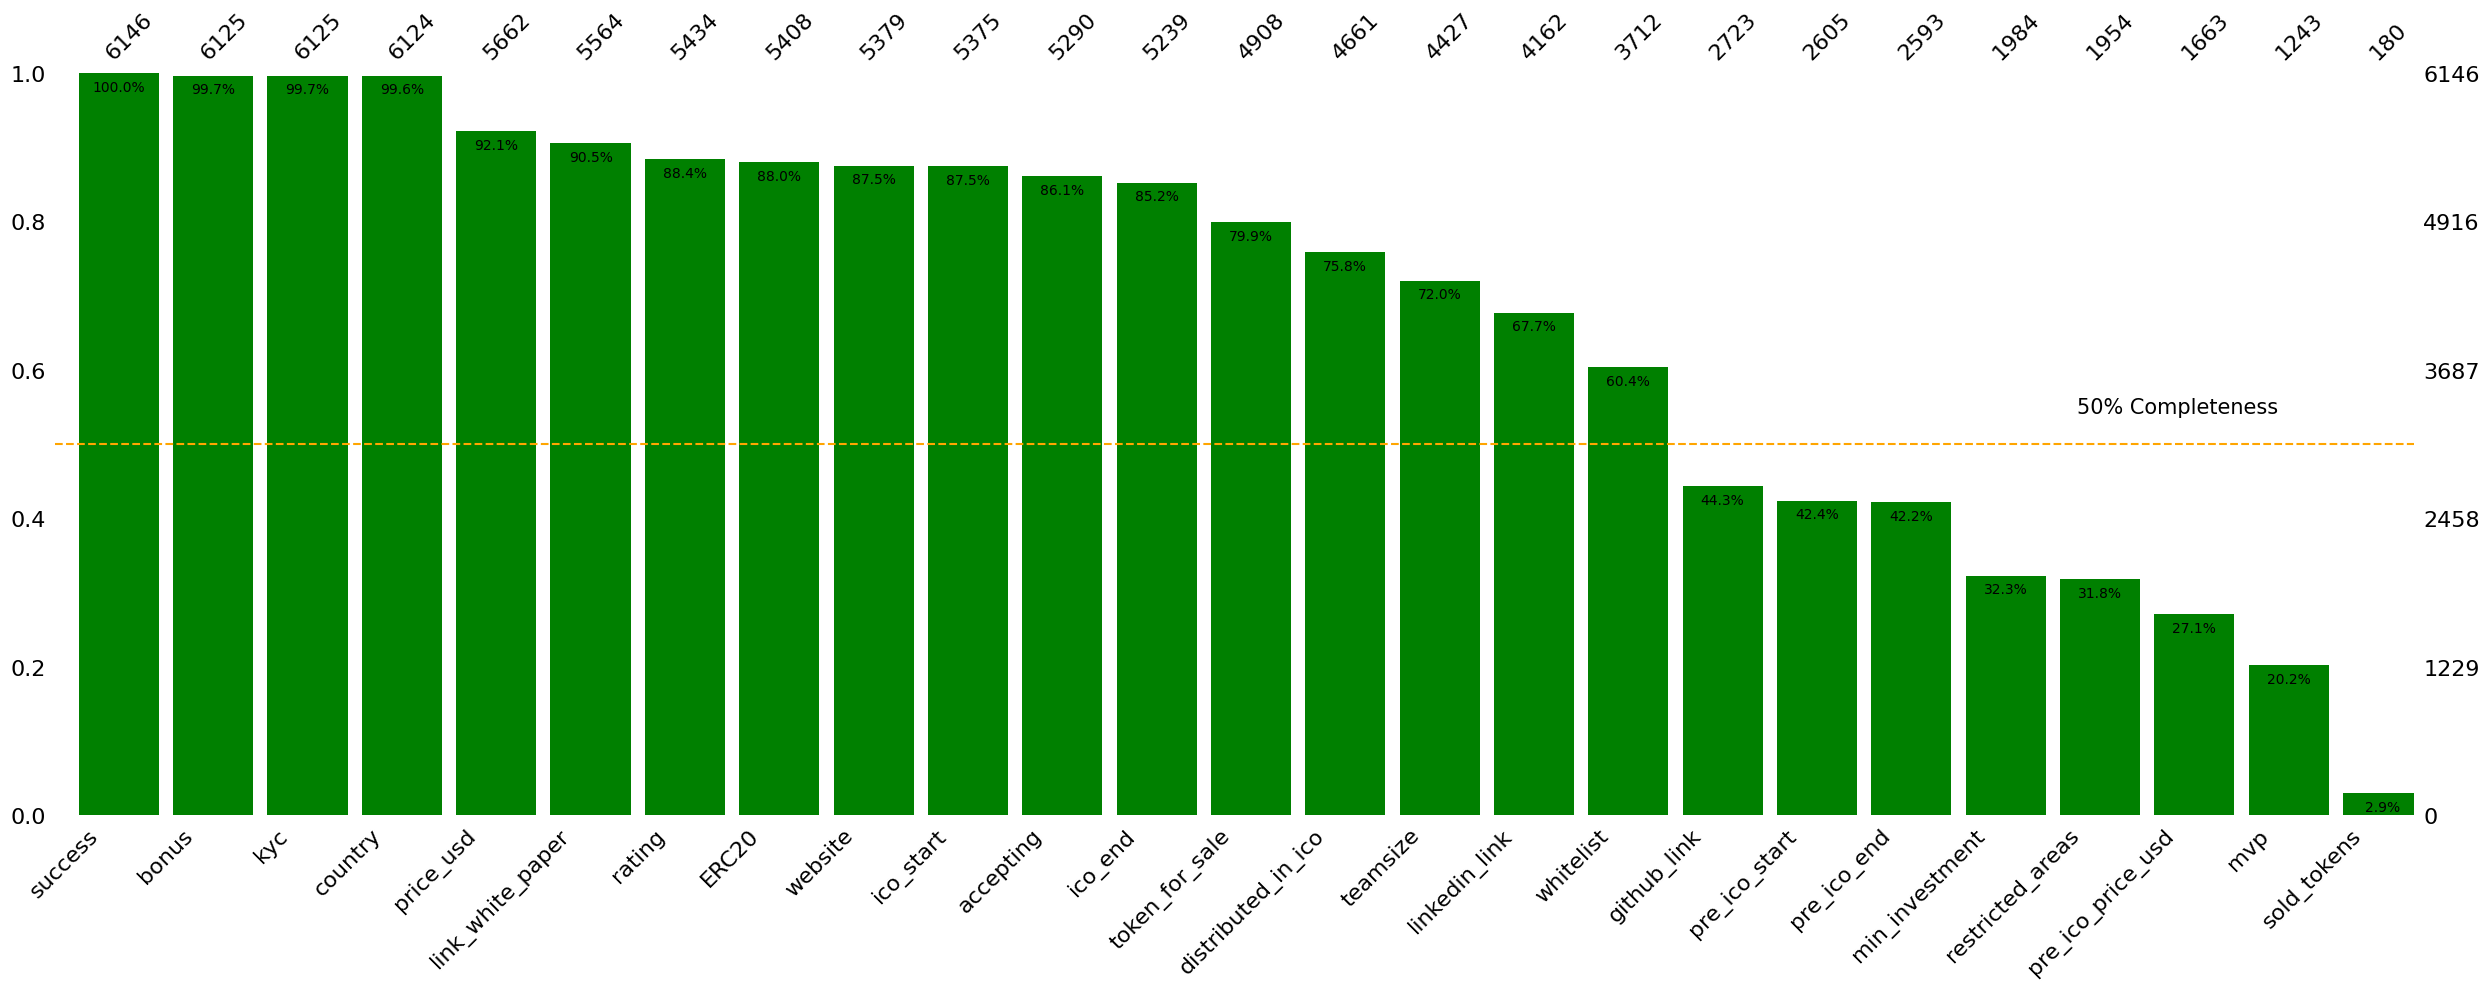

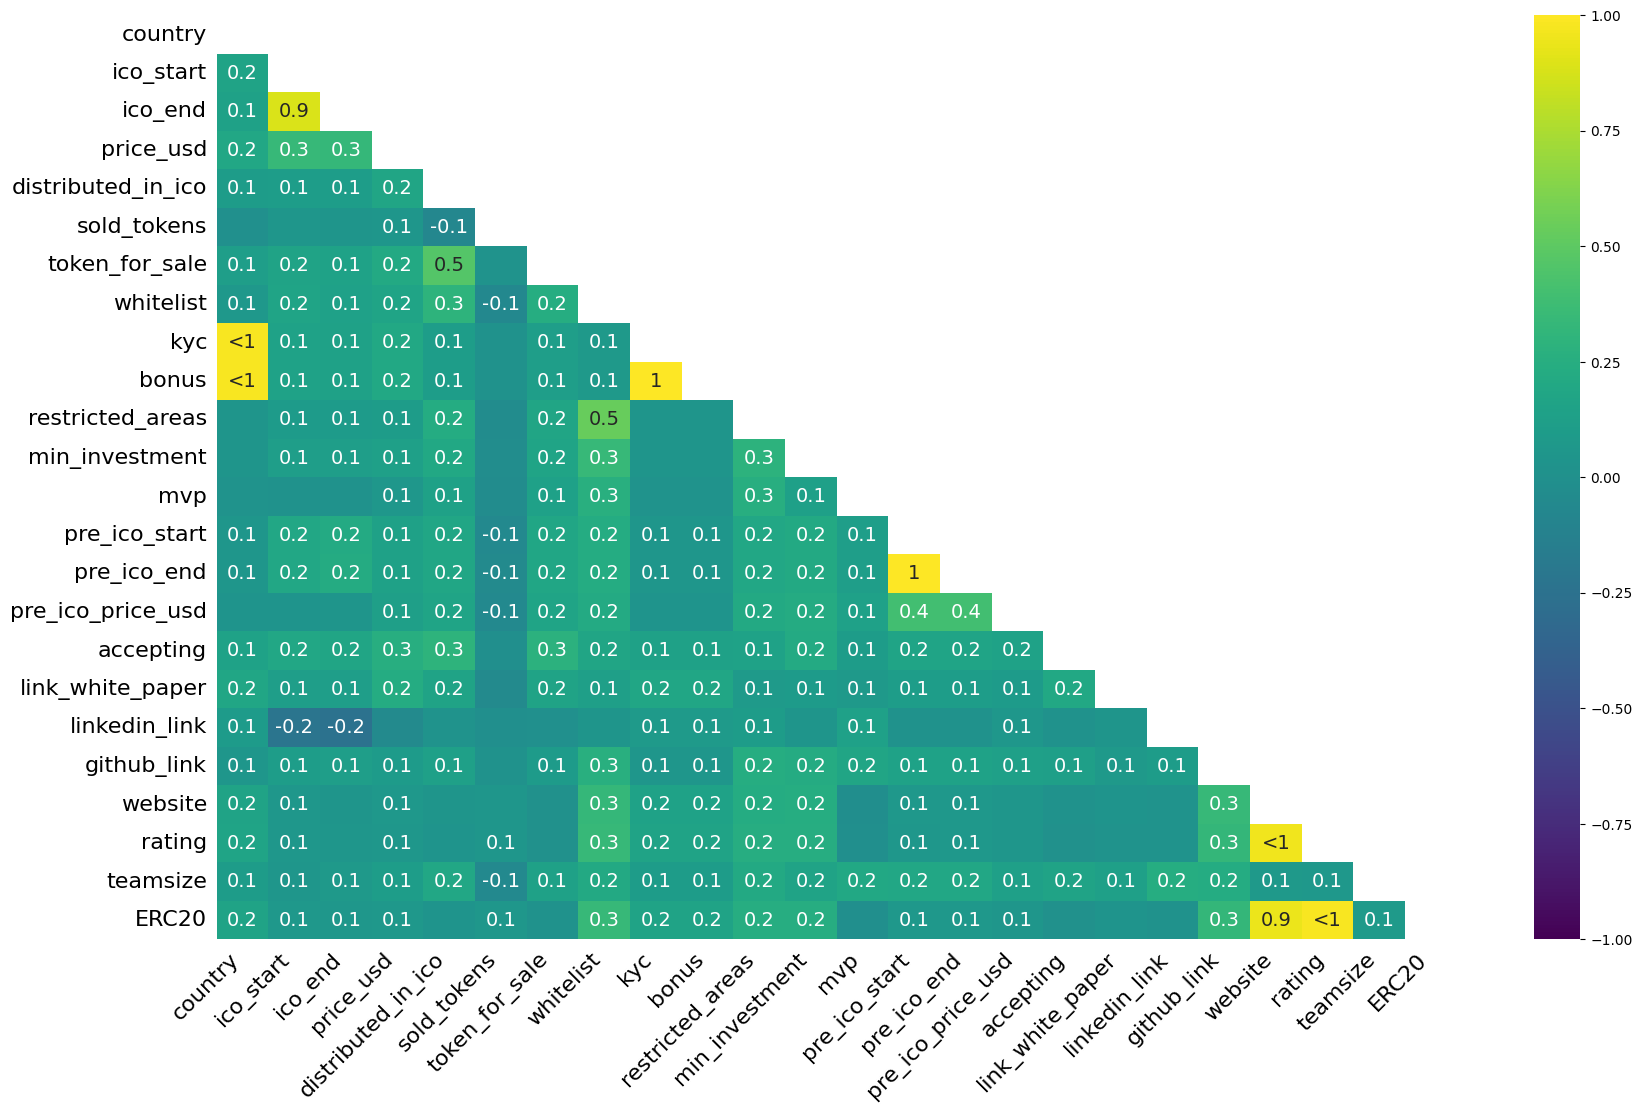

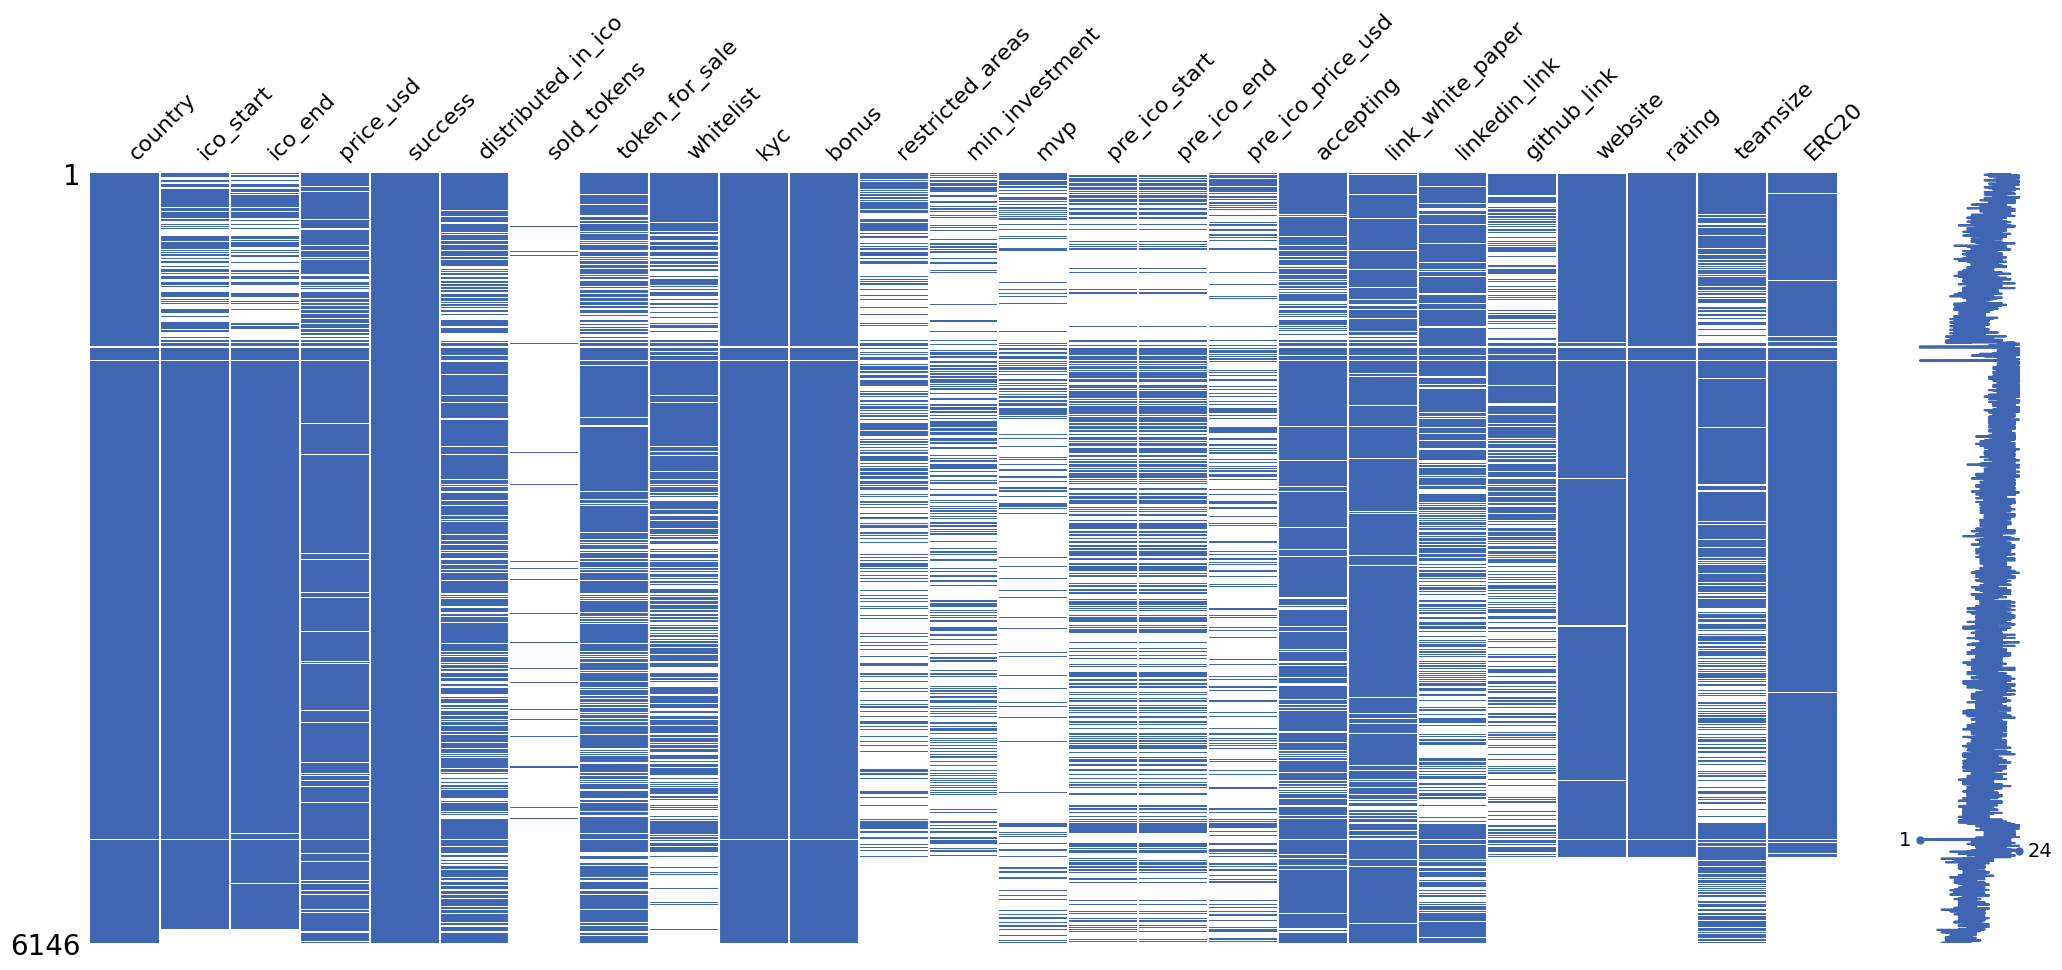

In [29]:
# Create figure with larger size for better readability
plt.figure(figsize=(12, 2))
ax = msno.bar(data, 
              color="green", 
              sort="descending")     # Sort bars by completeness
# Adjust bar width after plotting
for patch in ax.patches:
    patch.set_width(0.85)
# Calculate and add percentage labels
for container in ax.containers:
    # Get heights from the rectangles
    heights = [rect.get_height() for rect in container]
    # Add percentage labels on top of each bar
    ax.bar_label(container, 
                 labels=[f'{(height/1)*100:.1f}%' for height in heights],
                 padding=-15)
#add mid line (50% line) 
plt.axhline(y=0.5, color='orange', linestyle='--', label='50% Completeness')

# Add legend in the middle right
plt.text(0.9, 0.55, '50% Completeness', color='black', fontsize=15, ha='center', va='center', transform=ax.transAxes)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Mapa de calor de valores nulos
msno.heatmap(data, cmap="viridis")  # Muestra correlación de nulos entre columnas
plt.show()

# Matriz de valores nulos
msno.matrix(data, color=(0.25, 0.4, 0.7))  # Muestra distribución de los valores faltantes
plt.show()

### Price columns

In [30]:
# Filter non-numeric values from price_usd column
def is_numeric(x):
    try:
        float(x)
        return False
    except:
        return True

# Get unique non-numeric values
non_numeric_prices = data['price_usd'][data['price_usd'].astype(str).apply(is_numeric)].unique()

print("Unique non-numeric price formats(price_usd):")
for price in non_numeric_prices:
    print(f"- {price}")

Unique non-numeric price formats(price_usd):
- 1 KBX = 0.00011 ETH
- 1 TPLAY = 0.0012 ETH
- 1 DGO = 0.0004705882 ETH
- 1 HIX = 0.01 EUR
- 1 KIMERA = 0.00036 ETH
- 1 RLZ = 0.0002 ETH
- 1 BILL = 1 XLM
- 1 TRE = 0.0001 ETH
- 1 BATT = 0.000033 ETH
- 1 CCR = 0.0002 ETH
- 1 InBit = 0.01 EUR
- 1 TRU = 0.0008888889 ETH
- 1 ICX = 400 STG
- 1 AXT = 0.00025 ETH
- 1 JPT = 0.4 EUR
- 1 SYM = 0.00023697 ETH
- 1 MARA = 0.134 EUR
- 1 SPRING = 0.00002 ETH
- 1 BHM = 0.5 EUR
- 1 MDR = 0.0004 ETH
- 1 SQUID = 0.15 GBP
- 1 RENC = 0.001 ETH
- 1 BLOCK = 0.0001 ETH
- 1 BOOK = 0.1 EUR
- 1 TMED = 0.0000125 ETH
- 1 TBE = 0.000125 ETH
- 1 URP = 0.025 EUR
- 1 NAME = 0.00005 ETH
- 1 ABT Token = 0.000333 ETH
- 1 ARIA = 0.000035 BTC
- 1 GRD = 0.00005 ETH
- 1 MONI = 1 ETH
- 1 TTR = 0.0006666667 ETH
- 1 XSR = 0.0002 ETH
- 1 AMEC = 0.00025 ETH
- 1 ATLS = 0.0001 ETH
- 1 BSSX = 0.0001 ETH
- 1 mHLX = 0.02 EUR
- 1 jNetCoin = 0.0001 BTC
- 1 CATER = 0.0001470588 ETH
- 1 SPL = 0.01 ETH
- 1 Kibble/KIBL = 1.05 ETH
- 1 VTY = 0.0000

In [31]:
# Filter non-numeric values from min_investment column
# Get unique non-numeric values
non_numeric_prices = data['min_investment'][data['min_investment'].astype(str).apply(is_numeric)].unique()

print("Unique non-numeric price formats (min_investment):")
for price in non_numeric_prices:
    print(f"- {price}")

Unique non-numeric price formats (min_investment):
- 50 USD
- 100 USD
- 0.10 USD
- 1 ETH
- 100 HASH
- 10 EUR
- 1 USD
- 0.1 ETH
- 100 EUR
- 0.01 ETH
- 0.5 ETH
- 0.02 ETH
- 500 BFC
- 500 BNR
- 1000 USD
- 1,000 USD
- 7 ETH
- 0.25 ETH
- 1,000 PLS
- 10 USD
- 150 EUR
- 0.223 ETH
- 5,000 USD
- 1 NEO
- 300 ICX
- 200 SWG
- 0.0025 ETH
- 100 YON
- 0.2 ETH
- 0.15 ETH
- 25 ETH
- 200 USD
- 500 USD
- 5 USD
- 30 BXM
- 0.05 ETH
- 15 CONM
- 10 Deed
- 150 USD
- 0.20 ETH
- 50 EUR
- 30,000 VET
- 1,000 REG
- 0.4ETH
- 0,1 ETH
- 100 UGT
- 60 USD
- 250 USD
- 100,000 USD
- 50 BMK
- 10.000 USD
- 20 USD
- 10,000 USD
- 500 HALA
- 100 ICOIN
- 20,000 USD
- 300 USD
- 60 EUR
- 100 DOMI
- presale: 1,000 USD / crowdsale: 100 USD
- 15 EUR
- 30,000 USD
- 1,000 MERO
- 0.001 ETH
- 500 $
- 5000 USD
- 0.3 ETH
- 100 CRN
- 5 ETH
- none
- 300 EUR
- 80 USDT
- 0.1 BTC
- 5 GBR
- 2 ETH
- 1,000 ZAZA
- 0.03 ETH
- 20 HRBE
- 0.47 ETH
- 500 ZNC
- 30 USD
- 100 BCCN
- 0.04 ETH
- 25 USD
- 15 USD
- 1 DEO = 0.5 USD
- 1 Neo
- 3,000 EUR
- 300 E

In [32]:
# Filter non-numeric values from pre_ico_price_usd column
# Get unique non-numeric values
non_numeric_prices = data['pre_ico_price_usd'][data['pre_ico_price_usd'].astype(str).apply(is_numeric)].unique()

print("Unique non-numeric price formats (pre_ico_price_usd):")
for price in non_numeric_prices:
    print(f"- {price}")

Unique non-numeric price formats (pre_ico_price_usd):
- 1 2GT = 0.05 EUR
- 1 PAX = 0.5 EUR
- 1 ETH = 6000 QUA
- 1 BNR = 0.0001 ETH
- 1 KBX = 0.00011 ETH
- 1 TPLAY = 0.0009 ETH
- 1 ETH = 5,000 CEN
- 1 CTY = 0.0075 EUR
- 1 DYNO = 0.0000636 ETH
- 1 SilkRoadCoin / SRC = 0.8 EUR
- 0.04 EUR
- 1 RDT = 0.001 ETH
- 1 ETH = 12,500 YDST
- 1 ICX = 400 STG
- 1 MARA = 0.10 EUR
- 14 000MCC = 1 ETH
- 1 RLP = 0.0008 ETH
- 1 BHM = 0.22 EUR
- 1 Tellus = 0.08 EUR
- 1 NUK = 0.000004 ETH
- 1 SQUID = 0.075 GBP
- 1 EHF = 0.006 ETH
- 1 ETH = 1500 ELET
- 1 ETH = 35,000 LTS
- 1 TWC = 0.0002 ETH
- 1 ABT Token = 0.000333 ETH
- 1 ETH = 24,000 GRD
- 1 ETH = 7,500 MDT
- 1 MOVE = 0.00167 ETH
- 1 OPP = 0.0002 ETH
- 1 AMEC = 0.00025 ETH
- 1 BALT = 0.00020 ETH
- 1 OX = 0.0004 ETH
- 1 ETH = 10,000 BSSX
- 1 BRICK =  0.000550 ETH
- 1 cPay = 0.1 EUR
- 1 DSTT = 0.00025 ETH
- 1 mHLX = 0.015 EUR
- 1 INK = 0.008695652173 QTUM
- 1 ETH = 10000 PLAY
- 1 ETH = 230 PEF
- 1 ETH = 7,000 AFL
- 1 HBY = 0.001 ETH
- 1 ETH = 3,000 MFR
- 1 M

#### Function to parse price columns (pre_ico_price_usd, price_usd, min_invesment)

In [33]:
def parse_price(price_str):
    """
    Parse a price string and return (value, currency).
    Returns (None, None) if parsing fails.
    """
    if pd.isnull(price_str):
        return None, None
    
    # Clean up the string
    price_str = price_str.strip()
    
    # If the format is like "1 TOKEN = 0.15 GBP", we take the right side.
    if '=' in price_str:
        parts = price_str.split('=')
        price_str = parts[-1].strip()
    
    # Regex to match a number (including scientific notation) and an optional currency code
    match = re.search(r'([0-9\.Ee+-]+)\s*([A-Za-z]+)?', price_str)
    if match:
        try:
            value = float(match.group(1))
        except ValueError:
            value = None
        # If no currency is found, assume USD (or decide based on context)
        currency = match.group(2).upper() if match.group(2) else 'USD'
        return value, currency
    else:
        return None, None

# Example:
example_prices = [
    "0.01", "3.91E-02", "NA", "1", 
    "1 SQUID = 0.15 GBP", "1 RENC = 0.001 ETH", "1 BLOCK = 0.0001 ETH"
]
for p in example_prices:
    print(p, "->", parse_price(p))


0.01 -> (0.01, 'USD')
3.91E-02 -> (0.0391, 'USD')
NA -> (None, None)
1 -> (1.0, 'USD')
1 SQUID = 0.15 GBP -> (0.15, 'GBP')
1 RENC = 0.001 ETH -> (0.001, 'ETH')
1 BLOCK = 0.0001 ETH -> (0.0001, 'ETH')


#### Parse price_usd

In [34]:
# Apply the parse_price function and create separate columns for price and currency
data[['price_value', 'price_currency']] = pd.DataFrame(
    data['price_usd'].apply(parse_price).tolist(), 
    index=data.index
)

# Verify the results
print("Sample of parsed prices:")
print(data[['price_usd', 'price_value', 'price_currency']].head())

# Get value counts and percentages
vc = pd.DataFrame({
    'Count': data['price_currency'].value_counts(dropna=False),
    'Percentage': data['price_currency'].value_counts(dropna=False, normalize=True) * 100
})

# Format percentage column
vc['Percentage'] = vc['Percentage'].round(2).astype(str) + '%'

# Display results
display(vc)

Sample of parsed prices:
  price_usd  price_value price_currency
0      0.01         0.01            USD
1       0.1         0.10            USD
2      0.14         0.14            USD
3       0.1         0.10            USD
4      0.06         0.06            USD


,Count,Percentage
price_currency,,
USD,5495,89.41%
None,484,7.88%
ETH,123,2.0%
EUR,15,0.24%
BTC,5,0.08%
XLM,4,0.07%
GBP,2,0.03%
TRX,2,0.03%
KRW,1,0.02%


#### Parse min_investment

In [35]:
# Apply the parse_price function and create separate columns for price and currency
data[['min_investment_value', 'min_investment_currency']] = pd.DataFrame(
    data['min_investment'].apply(parse_price).tolist(), 
    index=data.index
)

# Verify the results
print("Sample of parsed min investment:")
print(data[['min_investment', 'min_investment_value', 'min_investment_currency']].head())

# Get value counts and percentages
vc = pd.DataFrame({
    'Count': data['min_investment_currency'].value_counts(dropna=False),
    'Percentage': data['min_investment_currency'].value_counts(dropna=False, normalize=True) * 100
})

# Format percentage column
vc['Percentage'] = vc['Percentage'].round(2).astype(str) + '%'

# Display results
display(vc)

Sample of parsed min investment:
  min_investment  min_investment_value min_investment_currency
0         50 USD                  50.0                     USD
1            NaN                   NaN                    None
2        100 USD                 100.0                     USD
3       0.10 USD                   0.1                     USD
4          1 ETH                   1.0                     ETH


,Count,Percentage
min_investment_currency,,
None,4163,67.74%
ETH,959,15.6%
USD,673,10.95%
EUR,53,0.86%
BTC,31,0.5%
...,...,...
CEDEX,1,0.02%
CWR,1,0.02%
ETM,1,0.02%


#### Parse pre_ico_price_usd

In [36]:
# Apply the parse_price function and create separate columns for price and currency
data[['pre_ico_price_value', 'pre_ico_price_currency']] = pd.DataFrame(
    data['pre_ico_price_usd'].apply(parse_price).tolist(), 
    index=data.index
)

# Verify the results
print("Sample of parsed min investment:")
print(data[['pre_ico_price_usd', 'pre_ico_price_value', 'pre_ico_price_currency']].head())

# Get value counts and percentages
vc = pd.DataFrame({
    'Count': data['pre_ico_price_currency'].value_counts(dropna=False),
    'Percentage': data['pre_ico_price_currency'].value_counts(dropna=False, normalize=True) * 100
})

# Format percentage column
vc['Percentage'] = vc['Percentage'].round(2).astype(str) + '%'

# Display results
display(vc)

Sample of parsed min investment:
  pre_ico_price_usd  pre_ico_price_value pre_ico_price_currency
0          5.00E-03                0.005                    USD
1               NaN                  NaN                   None
2               NaN                  NaN                   None
3               0.1                0.100                    USD
4              0.03                0.030                    USD


,Count,Percentage
pre_ico_price_currency,,
None,4483,72.94%
USD,1547,25.17%
ETH,58,0.94%
EUR,20,0.33%
CHF,2,0.03%
USDT,1,0.02%
GRD,1,0.02%
CAM,1,0.02%
LANC,1,0.02%


### Export pre dataset

In [37]:
#export to excel all the dataset with all the changes
# data.to_excel('ICO_data_eda.xlsx', index=False)

## Countries

C:\Users\luish\AppData\Local\Temp\ipykernel_20208\3640160033.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette=pastel_blue_palette)


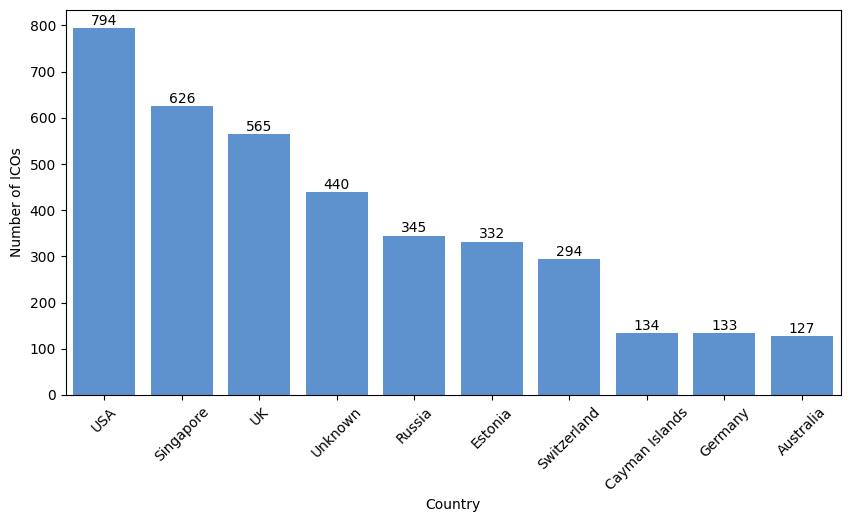

In [68]:
# determine the top 10 countries with more number of ICOs and plot in a barr chart
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
# Define pastel blue palette from lighter to darker
pastel_blue_palette = ["#E3F2FD", "#BBDEFB", "#90CAF9", "#64B5F6", "#42A5F5", 
                      "#2196F3", "#1E88E5", "#1976D2", "#1565C0", "#0D47A1"]
pastel_blue_palette = ["#4A90E2"] * 10  # Single professional pastel blue color

sns.barplot(x=top_countries.index, y=top_countries.values, palette=pastel_blue_palette)
# add labels to the bars
for i, v in enumerate(top_countries.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
#plt.title('Top 10 Countries with Most ICOs')
plt.xlabel('Country')
plt.ylabel('Number of ICOs')
plt.xticks(rotation=45)
plt.show()
# save a variable with the top 5 countries excluding "UnKnown"
top_countries = data['country'].value_counts().head(6)
top_5_countries = top_countries[top_countries.index != 'Unknown']




# Data Preparation

## Data Cleaning

#### Function to get cryto rate conversion to USD

In [53]:
def get_crypto_rate_cc(crypto: str, date: datetime) -> float:
    """
    Get historical price of a cryptocurrency in USD using CryptoCompare API.
    
    Parameters:
        crypto (str): Cryptocurrency symbol, e.g., 'ETH'.
        date (datetime): Date for which to get the historical price.
        
    Returns:
        float: Price in USD or None if data is unavailable.
    """
    # Convert the date to a Unix timestamp (in seconds)
    timestamp = int(date.timestamp())
    
    # Construct the API URL
    url = f"https://min-api.cryptocompare.com/data/pricehistorical"
    params = {
        'fsym': crypto.upper(),  # from symbol, e.g., ETH
        'tsyms': 'USD',          # target currency: USD
        'ts': timestamp          # historical timestamp
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raises an error for bad responses
        data = response.json()
        # Expected data format: { "ETH": { "USD": 400.0 } }
        return data.get(crypto.upper(), {}).get('USD', None)
    except Exception as e:
        print(f"Error retrieving data for {crypto} on {date.strftime('%Y-%m-%d')}: {e}")
        return None

# Example usage:
example_date = datetime(2017,12, 25)
rate = get_crypto_rate_cc('ETH', example_date)
print(f"Historical rate for ETH on {example_date.strftime('%Y-%m-%d')}: {rate} USD")

Historical rate for ETH on 2017-12-25: 723.14 USD


#### Function to convert to USD

In [39]:
def convert_to_usd(row, value_col, currency_col, date_col='ico_end'):
    """
    Convert any price value to USD based on currency and date
    
    Parameters:
        row: DataFrame row
        value_col: Name of column containing the value to convert
        currency_col: Name of column containing the currency
        date_col: Name of column containing the date (default: 'ico_end')
    Returns:
        float: Price in USD
    """
    # If already in USD, return the value
    if row[currency_col] == 'USD':
        return row[value_col]
    
    if pd.isna(row[value_col]) or pd.isna(row[date_col]):
        return None
       
    # Convert date string to datetime if needed
    if isinstance(row[date_col], str):
        try:
            date = pd.to_datetime(row[date_col])
        except:
            return None
    else:
        date = row[date_col]
    
    # Add rate limiting to avoid API throttling
    time.sleep(0.1)  # 100ms delay between requests

    # Get conversion rate
    rate = get_crypto_rate_cc(row[currency_col], date)
    
    if rate is not None:
        return row[value_col] * rate
    return None

### Apply conversion to price_usd, min_invesment

In [40]:
# Apply conversion to price_usd
data['price_usd_converted'] = data.apply(
    lambda row: convert_to_usd(row, 'price_value', 'price_currency'), 
    axis=1
)

# Apply conversion to min_investment
data['min_investment_usd_converted'] = data.apply(
    lambda row: convert_to_usd(row, 'min_investment_value', 'min_investment_currency'),
    axis=1
)

# Display results
print("Sample of converted values:")
print(data[[
    'ico_end',
    'price_value', 'price_currency', 'price_usd_converted',
    'min_investment_value', 'min_investment_currency', 'min_investment_usd_converted'
]].head())

# Check conversion statistics
print("\nConversion statistics:")
print("Price USD conversion success rate: {:.2f}%".format(
    100 * data['price_usd_converted'].notna().mean()
))
print("Min Investment USD conversion success rate: {:.2f}%".format(
    100 * data['min_investment_usd_converted'].notna().mean()
))

Sample of converted values:
     ico_end  price_value price_currency  price_usd_converted  \
0 2020-12-31         0.01            USD                 0.01   
1 2020-12-31         0.10            USD                 0.10   
2 2020-12-31         0.14            USD                 0.14   
3 2021-01-31         0.10            USD                 0.10   
4        NaT         0.06            USD                 0.06   

   min_investment_value min_investment_currency  min_investment_usd_converted  
0                  50.0                     USD                          50.0  
1                   NaN                    None                           NaN  
2                 100.0                     USD                         100.0  
3                   0.1                     USD                           0.1  
4                   1.0                     ETH                           NaN  

Conversion statistics:
Price USD conversion success rate: 89.64%
Min Investment USD conversion succe

### Export excel data cleaned

In [41]:
data.to_excel('ico_data_cleaned.xlsx', 
              index=False,              # Don't include index
              sheet_name='ICO Data',    # Name of the worksheet
              engine='openpyxl',        # Excel engine to use
              float_format="%.4f")      # Format for floating point numbers

### Reapply to min_invesment with excel_rev1

In [52]:
# read the excel file ico_data_cleaned_rev1.xlsx
data_cleaned = pd.read_excel('ico_data_cleaned_rev1.xlsx', engine='openpyxl')
# apply the conversion to min_investment only rows with the column try_again == yes
mask = data_cleaned['try_again'] == 'yes'

# Apply conversion only to masked rows
data_cleaned.loc[mask, 'min_investment_usd_converted'] = data_cleaned[mask].apply(
    lambda row: convert_to_usd(row, 'min_investment_value', 'min_investment_currency'), 
    axis=1
)
# Save the updated dataset
data_cleaned.to_excel('ico_data_cleaned_rev2.xlsx', 
                     index=False,
                     sheet_name='ICO Data',
                     engine='openpyxl',
                     float_format="%.4f")

In [54]:
# read the excel file ico_data_cleaned_rev3.xlsx
data_cleaned = pd.read_excel('ico_data_cleaned_rev3.xlsx', engine='openpyxl')
# apply the conversion to min_investment only rows with the column try_again == yes
mask = data_cleaned['try_again_2'] == 'yes'

# Apply conversion only to masked rows
data_cleaned.loc[mask, 'min_investment_usd_converted'] = data_cleaned[mask].apply(
    lambda row: convert_to_usd(row, 'min_investment_value', 'min_investment_currency'), 
    axis=1
)
# Save the updated dataset
data_cleaned.to_excel('ico_data_cleaned_rev4.xlsx', 
                     index=False,
                     sheet_name='ICO Data',
                     engine='openpyxl',
                     float_format="%.4f")

### Read data cleaned

In [1036]:
# read the excel file ico_data_cleaned_rev5.xlsx
data_cleaned = pd.read_excel('ico_data_cleaned_rev5.xlsx', engine='openpyxl')


### Cleaning min_investment_usd_converted, price_usd_converted

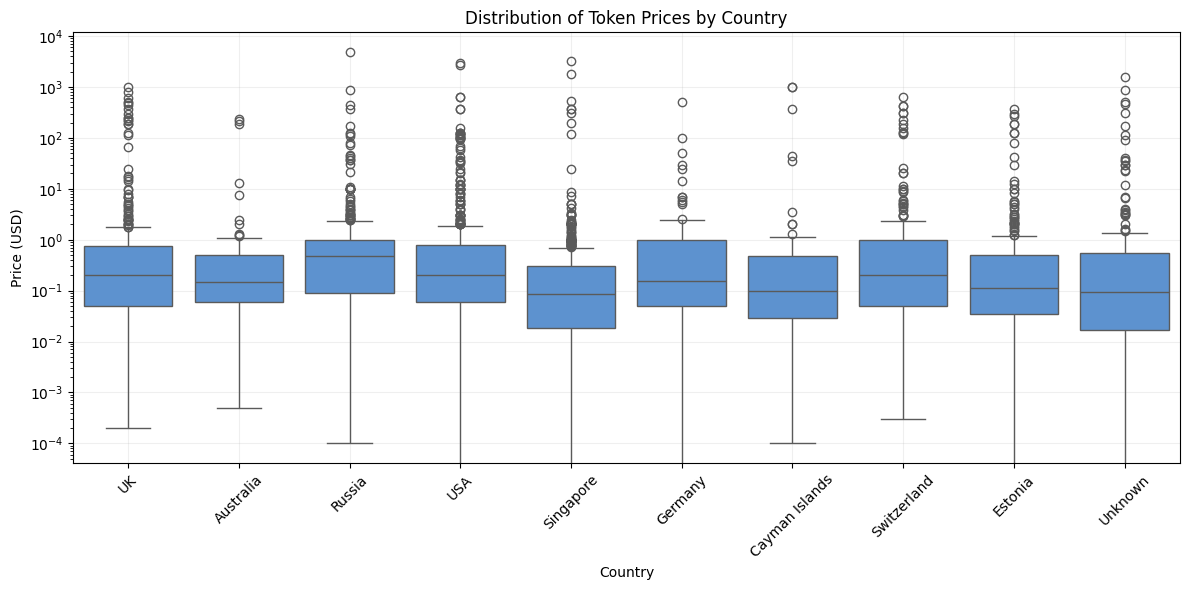


Price Statistics by Country (USD):
                count   mean     std  min   25%   50%   75%      max
country                                                             
Australia       117.0   5.88   33.56  0.0  0.06  0.15  0.50   230.77
Cayman Islands  124.0  20.09  130.47  0.0  0.03  0.10  0.48  1000.00
Estonia         316.0   6.00   35.59  0.0  0.03  0.11  0.50   375.00
Germany         117.0   6.77   47.35  0.0  0.05  0.16  1.00   501.00
Russia          313.0  25.03  283.20  0.0  0.09  0.47  1.00  4900.00
Singapore       562.0  12.71  159.60  0.0  0.02  0.09  0.30  3229.18
Switzerland     276.0  11.98   62.44  0.0  0.05  0.20  1.00   623.00
UK              519.0  12.51   78.33  0.0  0.05  0.20  0.74  1000.00
USA             699.0  14.58  159.56  0.0  0.06  0.20  0.80  3000.00
Unknown         313.0  14.24  110.94  0.0  0.02  0.10  0.55  1585.43


In [1037]:
# complete the missing values in the column min_investment_usd_converted with 0
data_cleaned['min_investment_usd_converted'] = data_cleaned['min_investment_usd_converted'].fillna(0)

# Create figure with proper size
plt.figure(figsize=(12, 6))

# Get top 5 countries by frequency (excluding 'Unknown')
top_countries = data_cleaned['country'].value_counts().head(10)
top_countries = top_countries[top_countries.index != 'Un'].index.tolist()

# Create boxplot for price_usd_converted by country
sns.boxplot(data=data_cleaned[data_cleaned['country'].isin(top_countries)], 
            x='country', 
            y='price_usd_converted',
            color='#4A90E2')

# Customize the plot
plt.title('Distribution of Token Prices by Country')
plt.xlabel('Country')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)

# Use log scale for better visualization of price distribution
plt.yscale('log')

# Add grid for better readability
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics by country
print("\nPrice Statistics by Country (USD):")
print(data_cleaned[data_cleaned['country'].isin(top_countries)]
      .groupby('country')['price_usd_converted']
      .describe()
      .round(2))


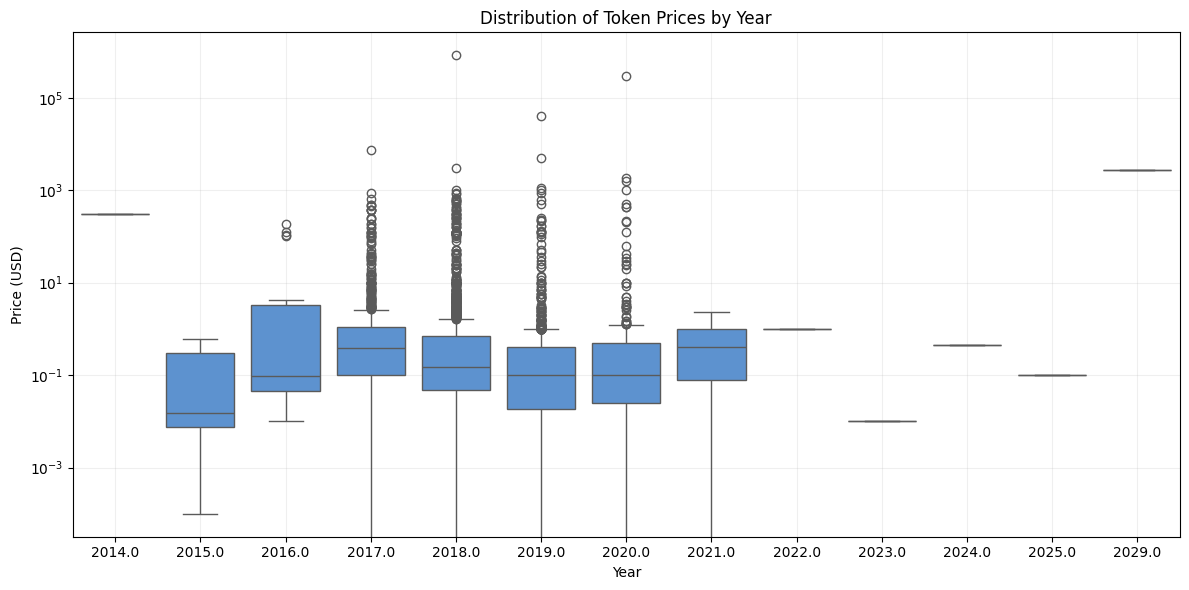


Price Statistics by Year (USD):
           count     mean       std      min      25%      50%      75%  \
ico_year                                                                  
2014.0       1.0   311.00       NaN   311.00   311.00   311.00   311.00   
2015.0       3.0     0.21      0.34     0.00     0.01     0.02     0.31   
2016.0      18.0    29.24     58.00     0.01     0.04     0.09     3.21   
2017.0     711.0    22.27    289.67     0.00     0.10     0.39     1.10   
2018.0    2753.0   308.51  15790.04     0.00     0.05     0.15     0.68   
2019.0    1074.0    47.60   1212.21     0.00     0.02     0.10     0.40   
2020.0     426.0   719.98  14534.88     0.00     0.03     0.10     0.50   
2021.0      27.0     0.53      0.54     0.00     0.08     0.40     1.00   
2022.0       1.0     1.00       NaN     1.00     1.00     1.00     1.00   
2023.0       1.0     0.01       NaN     0.01     0.01     0.01     0.01   
2024.0       1.0     0.45       NaN     0.45     0.45     0.45     

In [1038]:
# Extract year from ico_end and create boxplots by year
plt.figure(figsize=(12, 6))

# Create year column
data_cleaned['ico_year'] = pd.to_datetime(data_cleaned['ico_end']).dt.year

# Create boxplot
sns.boxplot(data=data_cleaned, 
            x='ico_year', 
            y='price_usd_converted',
            color='#4A90E2')

# Customize the plot
plt.title('Distribution of Token Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.xticks(rotation=0)

# Use log scale for better visualization
plt.yscale('log')

# Add grid for better readability
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics by year
print("\nPrice Statistics by Year (USD):")
print(data_cleaned.groupby('ico_year')['price_usd_converted']
      .describe()
      .round(2))

In [1039]:
# # Store original number of nulls for comparison
# original_nulls = data_cleaned['price_usd_converted'].isna().sum()

# # Years to impute
# years_to_impute = [2014, 2015, 2021, 2022, 2023, 2024, 2025, 2029]

# # Calculate means by year for the specified years
# year_means = data_cleaned[data_cleaned['ico_year'].isin(years_to_impute)].groupby('ico_year')['price_usd_converted'].mean()

# # Impute values for each year
# for year in years_to_impute:
#     year_mask = (data_cleaned['ico_year'] == year) & (data_cleaned['price_usd_converted'].isna())
#     data_cleaned.loc[year_mask, 'price_usd_converted'] = year_means[year]

# # Calculate number of imputations
# final_nulls = data_cleaned['price_usd_converted'].isna().sum()
# total_imputations = original_nulls - final_nulls

# # Print results
# print(f"Original missing values: {original_nulls}")
# print(f"Final missing values: {final_nulls}")
# print(f"Total imputations made: {total_imputations}")
# print("\nMean values used for imputation by year:")
# print(year_means.round(2))

In [1040]:

# # discard rows with price_usd_converted == 0
# data_cleaned = data_cleaned[data_cleaned['price_usd_converted'] != 0]



### Cleaning sold_tokens, token_for_sale, distributed_in_ico

In [1041]:
# discard column sold_tokens y token_for_sale : no enoguh data
if 'sold_tokens' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['sold_tokens'])
if 'token_for_sale' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['token_for_sale'])

# Correct the column distributed_in_ico based on value ranges
data_cleaned['distributed_in_ico'] = data_cleaned['distributed_in_ico'].apply(
    lambda x: x/100 if (x > 1 and x <= 99) else (
        x/1000 if (x > 100 and x <= 999) else x
    )
)



count    4658.000000
mean        0.533427
std         0.215210
min         0.000000
25%         0.400000
50%         0.550000
75%         0.700000
max         1.000000
Name: distributed_in_ico, dtype: float64


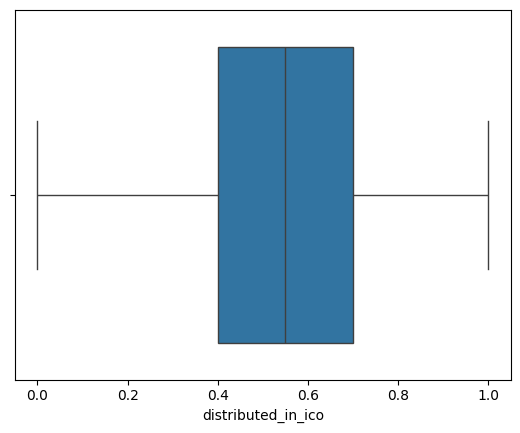

In [1042]:
print(data_cleaned['distributed_in_ico'].describe())
sns.boxplot(x=data_cleaned['distributed_in_ico'])
plt.show()

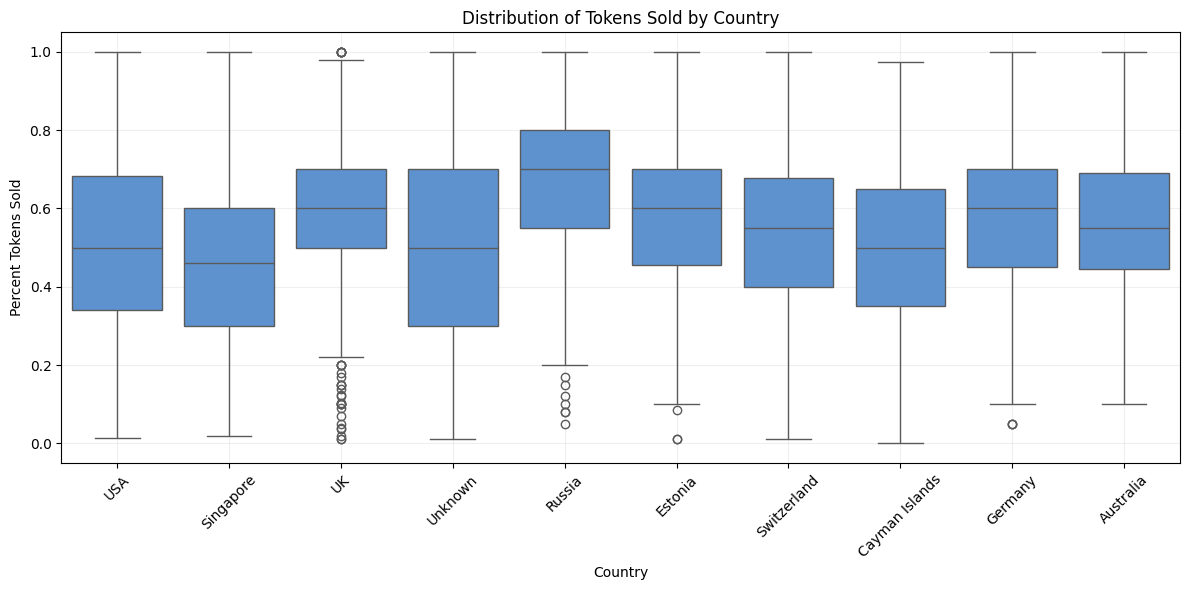


Percentage allocated to invertors by Country (USD):
                count  mean   std   min   25%   50%   75%   max
country                                                        
Australia       104.0  0.54  0.19  0.10  0.45  0.55  0.69  1.00
Cayman Islands  115.0  0.51  0.22  0.00  0.35  0.50  0.65  0.98
Estonia         291.0  0.57  0.19  0.01  0.46  0.60  0.70  1.00
Germany         108.0  0.56  0.22  0.05  0.45  0.60  0.70  1.00
Russia          224.0  0.66  0.18  0.05  0.55  0.70  0.80  1.00
Singapore       506.0  0.45  0.20  0.02  0.30  0.46  0.60  1.00
Switzerland     234.0  0.54  0.19  0.01  0.40  0.55  0.68  1.00
UK              441.0  0.57  0.20  0.01  0.50  0.60  0.70  1.00
USA             531.0  0.51  0.21  0.01  0.34  0.50  0.68  1.00
Unknown         266.0  0.49  0.24  0.01  0.30  0.50  0.70  1.00


In [1043]:
plt.figure(figsize=(12, 6))

top_countries = data_cleaned['country'].value_counts().head(10)
top_countries = top_countries[top_countries.index != 'Un'].index.tolist()

# Create boxplot for distributed_in_ico by country
sns.boxplot(data=data_cleaned[data_cleaned['country'].isin(top_countries)], 
            x='country', 
            y='distributed_in_ico',
            color='#4A90E2',
            order=top_countries)
plt.title('Distribution of Tokens Sold by Country')
plt.xlabel('Country')
plt.ylabel('Percent Tokens Sold')
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics by country
print("\nPercentage allocated to invertors by Country (USD):")
print(data_cleaned[data_cleaned['country'].isin(top_countries)]
      .groupby('country')['distributed_in_ico']
      .describe()
      .round(2))


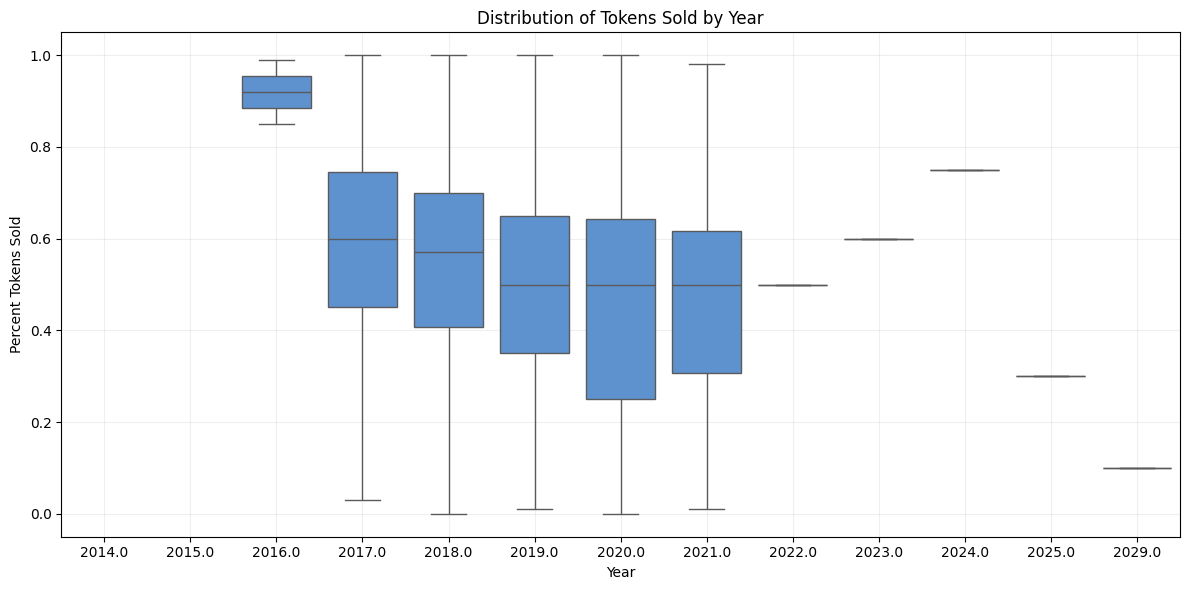


Percentage of Tokens Sold by Year:
           count  mean   std   min   25%   50%   75%   max
ico_year                                                  
2014.0       0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2015.0       0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2016.0       2.0  0.92  0.10  0.85  0.88  0.92  0.96  0.99
2017.0     375.0  0.58  0.21  0.03  0.45  0.60  0.74  1.00
2018.0    2292.0  0.56  0.20  0.00  0.41  0.57  0.70  1.00
2019.0     994.0  0.50  0.22  0.01  0.35  0.50  0.65  1.00
2020.0     380.0  0.45  0.25  0.00  0.25  0.50  0.64  1.00
2021.0      24.0  0.45  0.27  0.01  0.31  0.50  0.62  0.98
2022.0       1.0  0.50   NaN  0.50  0.50  0.50  0.50  0.50
2023.0       1.0  0.60   NaN  0.60  0.60  0.60  0.60  0.60
2024.0       1.0  0.75   NaN  0.75  0.75  0.75  0.75  0.75
2025.0       1.0  0.30   NaN  0.30  0.30  0.30  0.30  0.30
2029.0       1.0  0.10   NaN  0.10  0.10  0.10  0.10  0.10

Additional Statistics by Year:
-----------------------------------------------

In [1044]:
# Extract year from ico_end and create boxplots by year
plt.figure(figsize=(12, 6))

# Create year column if not already present
data_cleaned['ico_year'] = pd.to_datetime(data_cleaned['ico_end']).dt.year

# Create boxplot
sns.boxplot(data=data_cleaned, 
            x='ico_year', 
            y='distributed_in_ico',
            color='#4A90E2')

# Customize the plot
plt.title('Distribution of Tokens Sold by Year')
plt.xlabel('Year')
plt.ylabel('Percent Tokens Sold')
plt.xticks(rotation=0)

# Add grid for better readability
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics by year
print("\nPercentage of Tokens Sold by Year:")
print(data_cleaned.groupby('ico_year')['distributed_in_ico']
      .describe()
      .round(2))

# Additional statistics by year
print("\nAdditional Statistics by Year:")
print("-" * 50)
for year in sorted(data_cleaned['ico_year'].unique()):
    year_data = data_cleaned[data_cleaned['ico_year'] == year]['distributed_in_ico']
    if not year_data.empty:
        print(f"\nYear {year}:")
        print(f"Skewness: {year_data.skew():.3f}")
        print(f"Kurtosis: {year_data.kurtosis():.3f}")
        print(f"Number of ICOs: {len(year_data)}")

In [1045]:
# # impute the missing values in the column distributed_in_ico with the mean of each group by year of ico_end

# # Store original number of nulls for comparison
# original_nulls = data_cleaned['distributed_in_ico'].isna().sum()

# # Calculate means by year for distributed_in_ico, excluding NaN years
# year_means = data_cleaned[data_cleaned['ico_year'].notna()].groupby('ico_year')['distributed_in_ico'].mean()

# # Impute values only for years with non-NaN means
# for year in data_cleaned['ico_year'].dropna().unique():
#     if not pd.isna(year_means[year]):  # Only impute if mean is not NaN
#         year_mask = (data_cleaned['ico_year'] == year) & (data_cleaned['distributed_in_ico'].isna())
#         data_cleaned.loc[year_mask, 'distributed_in_ico'] = year_means[year]

# # Calculate number of imputations
# final_nulls = data_cleaned['distributed_in_ico'].isna().sum()
# total_imputations = original_nulls - final_nulls

# # Print results
# print(f"Original missing values: {original_nulls}")
# print(f"Final missing values: {final_nulls}")
# print(f"Total imputations made: {total_imputations}")
# print("\nMean values used for imputation by year:")
# print(year_means.round(2))

# # Print years that had NaN means (skipped for imputation)
# nan_years = year_means[year_means.isna()].index.tolist()
# if nan_years:
#     print("\nYears skipped due to NaN means:")
#     print(sorted(nan_years))

### Cleaning rating

In [1046]:
# exclude rows with rating NaN
data_cleaned = data_cleaned[data_cleaned['rating'].notna()]

### Cleaning teamsize

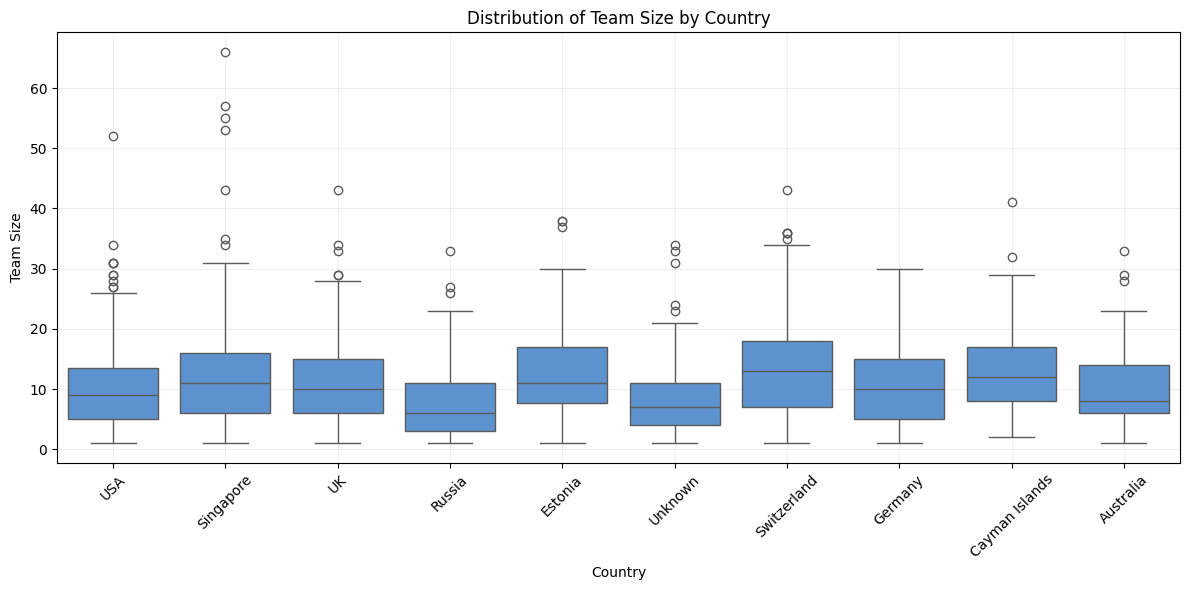


Team Size Statistics by Country:
                count   mean   std  min   25%   50%   75%   max
country                                                        
Australia        87.0  10.37  6.68  1.0  6.00   8.0  14.0  33.0
Cayman Islands  107.0  13.12  6.89  2.0  8.00  12.0  17.0  41.0
Estonia         260.0  12.48  6.97  1.0  7.75  11.0  17.0  38.0
Germany          93.0  10.68  6.59  1.0  5.00  10.0  15.0  30.0
Russia          201.0   7.48  5.70  1.0  3.00   6.0  11.0  33.0
Singapore       429.0  12.51  8.22  1.0  6.00  11.0  16.0  66.0
Switzerland     210.0  13.45  8.03  1.0  7.00  13.0  18.0  43.0
UK              394.0  10.65  6.52  1.0  6.00  10.0  15.0  43.0
USA             491.0   9.80  6.60  1.0  5.00   9.0  13.5  52.0
Unknown         124.0   8.46  6.39  1.0  4.00   7.0  11.0  34.0


In [1047]:
# Analize teamsize boxplot by country of teamsize
plt.figure(figsize=(12, 6))
# Get top 5 countries by frequency (excluding 'Unknown')
top_countries = data_cleaned['country'].value_counts().head(10)
top_countries = top_countries[top_countries.index != 'Un'].index.tolist()
# Create boxplot for team_size by country
sns.boxplot(data=data_cleaned[data_cleaned['country'].isin(top_countries)], 
            x='country', 
            y='teamsize',
            color='#4A90E2',
            order=top_countries)
plt.title('Distribution of Team Size by Country')
plt.xlabel('Country')   
plt.ylabel('Team Size')
plt.xticks(rotation=45) 
# Add grid for better readability
plt.grid(True, alpha=0.2)   
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

# Print summary statistics by country
print("\nTeam Size Statistics by Country:")
print(data_cleaned[data_cleaned['country'].isin(top_countries)]
      .groupby('country')['teamsize']
      .describe()
      .round(2))



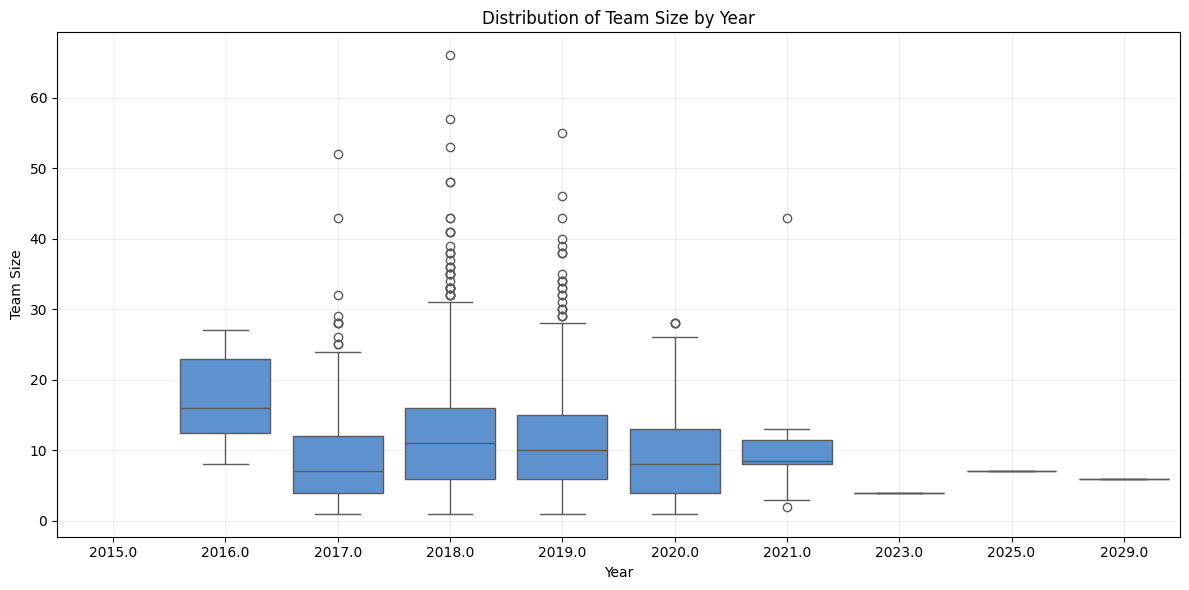


Team Size Statistics by Year:
           count   mean    std  min   25%   50%   75%   max
ico_year                                                   
2015.0       0.0    NaN    NaN  NaN   NaN   NaN   NaN   NaN
2016.0       7.0  17.43   7.09  8.0  12.5  16.0  23.0  27.0
2017.0     391.0   8.63   6.56  1.0   4.0   7.0  12.0  52.0
2018.0    2032.0  11.65   7.35  1.0   6.0  11.0  16.0  66.0
2019.0     835.0  11.12   7.31  1.0   6.0  10.0  15.0  55.0
2020.0     190.0   9.34   6.17  1.0   4.0   8.0  13.0  28.0
2021.0      10.0  11.60  11.56  2.0   8.0   8.5  11.5  43.0
2023.0       1.0   4.00    NaN  4.0   4.0   4.0   4.0   4.0
2025.0       1.0   7.00    NaN  7.0   7.0   7.0   7.0   7.0
2029.0       1.0   6.00    NaN  6.0   6.0   6.0   6.0   6.0


In [1048]:
# boxplots by year
plt.figure(figsize=(12, 6))
# Create boxplot
sns.boxplot(data=data_cleaned, 
            x='ico_year', 
            y='teamsize',
            color='#4A90E2')
# Customize the plot
plt.title('Distribution of Team Size by Year')
plt.xlabel('Year')
plt.ylabel('Team Size')
plt.xticks(rotation=0)
# Add grid for better readability
plt.grid(True, alpha=0.2)
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()
# Print summary statistics by year
print("\nTeam Size Statistics by Year:")
print(data_cleaned.groupby('ico_year')['teamsize']
      .describe()
      .round(2))


In [1049]:
# # Impute the missing values in the column teamsize with the mean of each group by country
# # Store original number of nulls for comparison
# original_nulls = data_cleaned['teamsize'].isna().sum()
# # Calculate means by country for teamsize
# country_means = data_cleaned.groupby('country')['teamsize'].median()
# # Impute values for each country
# for country in data_cleaned['country'].unique():
#     if not pd.isna(country_means[country]):  # Only impute if mean is not NaN
#         country_mask = (data_cleaned['country'] == country) & (data_cleaned['teamsize'].isna())
#         data_cleaned.loc[country_mask, 'teamsize'] = country_means[country]
# # Calculate number of imputations
# final_nulls = data_cleaned['teamsize'].isna().sum() 
# total_imputations = original_nulls - final_nulls
# # Print results
# print(f"Original missing values: {original_nulls}")
# print(f"Final missing values: {final_nulls}")
# print(f"Total imputations made: {total_imputations}")
# print("\nMean values used for imputation by country:")
# print(country_means.round(2))
# # Print countries that had NaN means (skipped for imputation)
# nan_countries = country_means[country_means.isna()].index.tolist()
# if nan_countries:
#     print("\nCountries skipped due to NaN means:")
#     print(sorted(nan_countries))


In [1050]:
# # impute the missing values in the column teamsize with the median of all the dataset
# # Store original number of nulls for comparison
# original_nulls = data_cleaned['teamsize'].isna().sum()
# # Calculate median for teamsize
# median_teamsize = data_cleaned['teamsize'].median()
# # Impute values for teamsize
# data_cleaned['teamsize'] = data_cleaned['teamsize'].fillna(median_teamsize)
# # Calculate number of imputations
# final_nulls = data_cleaned['teamsize'].isna().sum()
# total_imputations = original_nulls - final_nulls
# # Print results
# print(f"Original missing values: {original_nulls}")
# print(f"Final missing values: {final_nulls}")
# print(f"Total imputations made: {total_imputations}")









### Cleaning boolean columns 'ERC20', 'bonus','kyc', 'whitelist' 'mvp'

In [1051]:
# If values is Yes, convert to 1, if No convert to 0
for col in ['ERC20', 'bonus','kyc', 'whitelist']:
    data_cleaned[col] = data_cleaned[col].replace({'Yes': 1, 'No': 0})

# In mvp column, convert 'Available' to 1 and otherwise to 0
data_cleaned['mvp'] = (data_cleaned['mvp'] == 'Available').astype(int)



C:\Users\luish\AppData\Local\Temp\ipykernel_18984\1059103421.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned[col] = data_cleaned[col].replace({'Yes': 1, 'No': 0})


In [1052]:
# success column: Y:1, N:0
data_cleaned['success'] = data_cleaned['success'].map({'Y': 1, 'N': 0})

In [1053]:
data_cleaned.head()

,country,ico_start,ico_end,price_usd,success,distributed_in_ico,whitelist,kyc,bonus,restricted_areas,...,min_investment_value,min_investment_currency,pre_ico_price_value,pre_ico_price_currency,price_usd_converted,min_investment_usd_converted,Min_investment_edited,try_again,try_again_2,ico_year
0,India,2020-08-10,2020-12-31,0.01,1,0.5,1.0,1.0,1.0,"Pakistan, Turkey, Somalia, Sirya, Sudan",...,50.0,USD,0.005,USD,0.01,50.0,NaN,NaN,NaN,2020.0
1,Cyprus,2020-08-01,2020-12-31,0.1,0,0.6,0.0,1.0,0.0,USA,...,NaN,NaN,NaN,NaN,0.10,0.0,NaN,NaN,NaN,2020.0
2,UK,2019-03-01,2020-12-31,0.14,1,0.5,0.0,0.0,1.0,"Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...",...,100.0,USD,NaN,NaN,0.14,100.0,NaN,NaN,NaN,2020.0
3,UK,2020-06-25,2021-01-31,0.1,0,0.5,1.0,1.0,1.0,"Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...",...,0.1,USD,0.100,USD,0.10,0.1,NaN,NaN,NaN,2021.0
4,Seychelles,NaT,NaT,0.06,0,0.4,1.0,1.0,1.0,"USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES",...,1.0,ETH,0.030,USD,0.06,0.0,NaN,NaN,NaN,NaN


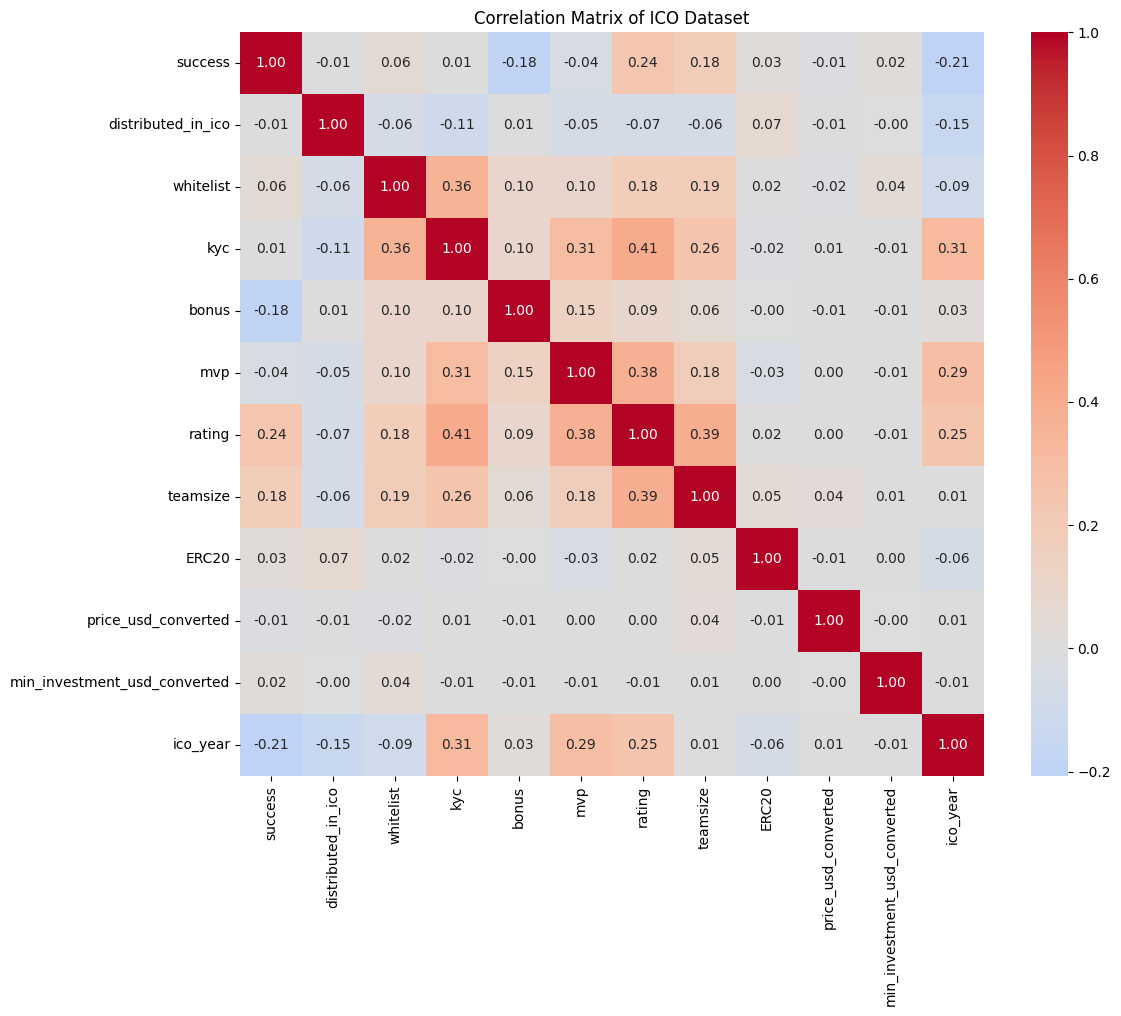

In [1054]:
# correlatioin matrix of all numeric varaibles
# Select only numeric columns
numeric_columns = data_cleaned.select_dtypes(include=['int64', 'float64', 'int']).columns

# Exclude columns: 'price_value', 'min_investment_value'
numeric_columns = numeric_columns[~numeric_columns.isin(['price_value', 'min_investment_value','pre_ico_price_value'])]


# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data_cleaned[numeric_columns].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            fmt=".2f",           # Format numbers to 2 decimal places
            cmap='coolwarm',     # Color scheme
            center=0,            # Center the colormap at 0
            square=True)         # Make cells square

# Customize plot
plt.title('Correlation Matrix of ICO Dataset')
plt.tight_layout()              # Adjust layout to prevent label cutoff

# Show plot
plt.show()


### Export to excel data cleaned


In [1055]:
data_cleaned.to_excel('ico_data_cleaned_final.xlsx', 
              index=False,              # Don't include index
              sheet_name='ICO Data',    # Name of the worksheet
              engine='openpyxl',        # Excel engine to use
              float_format="%.4f")      # Format for floating point numbers

## Data Featuring

In [1056]:
# create a copy of data_cleaned
data_featuring = data_cleaned.copy()

### missing indicator for dummy

In [1057]:
for col in ['ERC20', 'bonus', 'mvp','kyc', 'whitelist']:
    data_featuring[f'{col}_missing'] = data_featuring[col].isna().astype(int)

# If f'{col}_missing' column is all 0, drop the column
for col in ['ERC20', 'bonus', 'mvp','kyc', 'whitelist']:
    if data_featuring[f'{col}_missing'].sum() == 0:
        data_featuring.drop(columns=[f'{col}_missing'], inplace=True)
    else:
        # Use pandas nullable integer type to allow NA values
        data_featuring[col] = data_featuring[col].astype('Int64')

#### has pre_ico

In [1058]:
# Crear variable dummy 'has_pre_ico': 1 si ambas columnas tienen datos, 0 en otro caso
data_featuring['has_pre_ico'] = (
    data_featuring['pre_ico_price_value'].notna() & 
    data_featuring['pre_ico_price_currency'].notna()
).astype(int)

#### country, restricted_areas

In [1059]:
# Define the top 5 countries by total fundraising amount
top_5_countries = ['USA', 'UK', 'Singapore', 'Russia', 'Estonia']

# Create a new column: "top_5_countries" 1 if country is in top 5, else 0
data_featuring['top_5_countries'] = data_featuring['country'].isin(top_5_countries).astype(int)

# Create a new column: "usa_restricted" 1 if restricted_areas contains "usa" or "united states", else 0 (case-insensitive)
data_featuring['usa_restricted'] = data_featuring['restricted_areas'].str.contains(
    r'\b(?:u[\.\-]?\s?s[\.\-]?\s?a?|united\s+states)\b', case=False, na=False
).astype(int)

# New column "total_restricted_areas" with the number of restricted areas
data_featuring['total_restricted_areas'] = data_featuring['restricted_areas'].str.split(',').str.len().fillna(0).astype(int)


### link_white_paper, linkedin_link, github_link

In [1060]:
information_columns = ['link_white_paper', 'linkedin_link', 'github_link', 'website']

for col in information_columns:
    if col == 'link_white_paper':
        pattern = (
            r'(?i)\b(?:'
            r'https?://|' #   http:// or https://
            r'file://|' #   file://
            r'www\.|' #   www.
            r'[A-Za-z0-9\.-]+\.(?:com|io|eu)/'
            r')\S+'
        )
    elif col == 'linkedin_link':
        # Detect:
        #  • https://www.linkedin.com/in/…
        #  • https://www.linkedin.com/company/…
        #  • https://www.linkedin.com/showcase/…
        #  • linkedin.com/… (sin protocolo)
        #  • goo.gl/… (short link de Google)
        pattern = (
            r'(?i)\b(?:'
            # LinkedIn estandar
            r'https?://(?:www\.)?linkedin\.com/'
                r'(?:in|company|showcase)/\S*|'
            # LinkedIn without protocolo
            r'www\.linkedin\.com/'
                r'(?:in|company|showcase)/\S*|'
            r'linkedin\.com/'
                r'(?:in|company|showcase)/\S*|'
            # short link of google
            r'https?://goo\.gl/\S+'
            r')'
        )
    elif col == 'github_link':  # github_link
        pattern = r'(?i)\b(?:https?://|www\.)\S*github\.com/\S*'
    else: # website
        pattern = r'(?i)\b(?:https?://|www\.)\S*'

    data_featuring[col + '_flag'] = (
        data_featuring[col]
        .str.contains(pattern, case=False, na=False)
        .astype(int)
    )


### accepting

C:\Users\luish\AppData\Local\Temp\ipykernel_18984\1223684280.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=token_counts_df.head(15), x='Currency', y='Projects', palette='Blues_r')


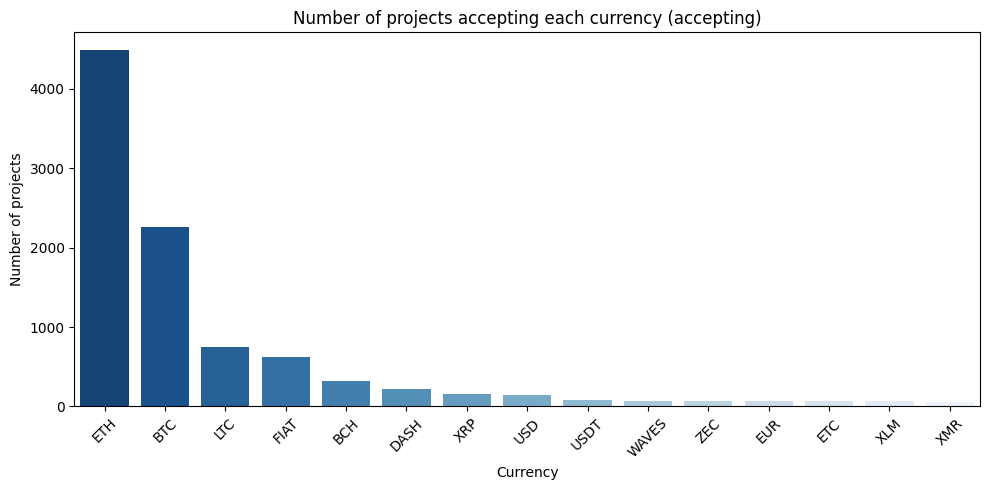

,Currency,Projects
0,ETH,4487
1,BTC,2258
2,LTC,744
3,FIAT,620
4,BCH,321
...,...,...
218,SUB,1
219,TIO,1
220,UTN,1
221,XCP,1


In [1061]:
import collections

# Analyze the "accepting" column and count the frequency of each accepted currency

# Remove nulls and convert to list of strings
accepting_series = data_featuring['accepting'].dropna().astype(str)

# Split by multiple separators, remove spaces, unify to uppercase
tokens = []
for entry in accepting_series:
    # Replace various separators with comma to unify
    entry = (entry.replace(' and ', ',')
                 .replace('(', ',')
                 .replace(')', ',')
                 .replace(';', ',')
                 .replace('/', ',')
                 .replace('.', ','))
    # Split by comma
    for token in entry.split(','):
        token = token.strip().upper()
        if token:  # Only add non-empty tokens
            tokens.append(token)

# Count frequency of each currency
token_counts = collections.Counter(tokens)

# Convert to sorted DataFrame
token_counts_df = (
    pd.DataFrame(token_counts.items(), columns=['Currency', 'Projects'])
    .sort_values('Projects', ascending=False)
    .reset_index(drop=True)
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=token_counts_df.head(15), x='Currency', y='Projects', palette='Blues_r')
plt.title('Number of projects accepting each currency (accepting)')
plt.xlabel('Currency')
plt.ylabel('Number of projects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display sorted table
display(token_counts_df)

# all currencies
all_currencies = token_counts_df['Currency'].tolist()
# print(all_currencies)


#### Generate columns from 'accepting':'accept_only_BTC_ETH':0,1; 'accept_only_BTC_ETH_LTC': 0,1; “accept_fiat”: 0,1; "accept_cryptos": 0,1; and “cryptocurrencies_accepted”: >=0

In [1062]:
# Create a dummy column "accept_only_BTC_ETH": 1 if only BTC and/or ETH are accepted, 0 otherwise

def accepts_only_btc_eth(entry):
    if pd.isnull(entry):
        return 0
    # Normalize separators and split
    entry = (entry.replace(' and ', ',')
                 .replace('(', ',')
                 .replace(')', ',')
                 .replace(';', ',')
                 .replace('/', ',')
                 .replace('.', ','))
    tokens = [token.strip().upper() for token in entry.split(',') if token.strip()]
    # Remove empty tokens
    tokens = [t for t in tokens if t]
    # Only BTC and/or ETH (no other tokens, no FIAT, etc.)
    allowed = {'BTC', 'ETH', 'ETHEREUM', 'BITCOIN'}
    tokens_upper = {t.upper() for t in tokens}
    return int(tokens_upper.issubset(allowed) and len(tokens) > 0)

data_featuring['accept_only_BTC_ETH'] = data_featuring['accepting'].apply(accepts_only_btc_eth)


In [1063]:
# Crear columna "accept_only_BTC_ETH_LTC": 1 if only accept BTC, ETH 
# 
# y/o LTC, 0 en otro caso

def accepts_only_btc_eth_ltc(entry):
    if pd.isnull(entry):
        return 0
    entry = (entry.replace(' and ', ',')
                 .replace('(', ',')
                 .replace(')', ',')
                 .replace(';', ',')
                 .replace('/', ',')
                 .replace('.', ','))
    tokens = [token.strip().upper() for token in entry.split(',') if token.strip()]
    allowed = {'BTC', 'ETH', 'LTC', 'ETHEREUM', 'BITCOIN', 'LITECOIN'}
    tokens_upper = {t.upper() for t in tokens}
    return int(set(tokens).issubset(allowed) and len(tokens) > 0)

data_featuring['accept_only_BTC_ETH_LTC'] = data_featuring['accepting'].apply(accepts_only_btc_eth_ltc)

In [1064]:
# accept_fiat: 1 if any FIAT currency is accepted, 0 otherwise

# List of common FIAT currencies (ISO 4217) and keywords
fiat_iso = [
    'USD', 'EUR', 'FIAT', 'GBP', 'JPY', 'CNY', 'CHF', 'RUB', 'CAD', 'AUD', 'NZD', 'SEK', 'NOK', 'DKK',
    'ZAR', 'MXN', 'BRL', 'INR', 'KRW', 'SGD', 'HKD', 'TRY', 'PLN', 'IDR', 'THB', 'MYR', 'PHP', 'CZK',
    'HUF', 'ILS', 'SAR', 'AED', 'KWD', 'EGP', 'NGN', 'ARS', 'CLP', 'COP', 'PEN', 'VND', 'UAH', 'RON',
    'BGN', 'HRK', 'ISK', 'LTL', 'LVL', 'EEK', 'SKK', 'SIT', 'TRL', 'YEN', 'POUND', 'DOLLAR', 'EURO'
]

# Filtramos solo los tokens que son FIAT desde accepting column
fiat_tokens = [
    t for t in all_currencies 
    if (
        t.upper() in fiat_iso                # código ISO
        or t.upper() in {'EURO', 'EU'}        # sin código ISO
        or 'FIAT' in t.upper()                # include the word FIAT
        or 'CREDIT CARD' in t.upper()         # include de word CREDIT CARD
        or 'WIRE' in t.upper()                  # include the word WIRE
        or 'ALL' in t.upper()                  # include the word ALL
    )
]
# print unique values of fiat_tokens
fiat_tokens = list(set(fiat_tokens))
# print(fiat_tokens)

# function to check if any FIAT currency is accepted
def has_fiat(entry):
    if pd.isnull(entry):
        return 0
    entry = entry.upper()
    # Normalize separators
    entry = (entry.replace(' AND ', ',')
                  .replace('(', ',')
                  .replace(')', ',')
                  .replace(';', ',')
                  .replace('/', ',')
                  .replace('.', ','))
    tokens = [token.strip() for token in entry.split(',') if token.strip()]
    # Check if any token is a FIAT currency
    for token in tokens:
        for fiat in fiat_tokens:
            if fiat in token:
                return 1
    return 0

data_featuring['accept_fiat'] = data_featuring['accepting'].apply(has_fiat)

In [1065]:
# accept_cryptos: 1 if any cryptocurrency is accepted, 0 otherwise

# List of common cryptocurrency symbols (top 100+ by market cap, can be extended)
crypto_keywords = [
    'BTC', 'ETH', 'LTC', 'BCH', 'XRP', 'BNB', 'EOS', 'XLM', 'ADA', 'TRX', 'USDT', 'DASH', 'XMR', 'ZEC', 'DOGE',
    'ETC', 'NEO', 'QTUM', 'OMG', 'LSK', 'BTG', 'VET', 'ICX', 'ZRX', 'BAT', 'DCR', 'NANO', 'WAVES', 'REP', 'KMD',
    'LINK', 'MKR', 'USDC', 'PAX', 'TUSD', 'DAI', 'BTT', 'HT', 'OKB', 'LEO', 'ATOM', 'XTZ', 'ALGO', 'RVN', 'ENJ',
    'HOT', 'MANA', 'SNT', 'GNT', 'LOOM', 'CVC', 'FUN', 'POWR', 'POLY', 'STORJ', 'GNO', 'QKC', 'REN', 'LEND', 'COMP',
    'SNX', 'YFI', 'UNI', 'AAVE', 'SUSHI', 'CRV', 'BAL', '1INCH', 'RSR', 'CEL', 'FTT', 'SRM', 'SOL', 'AVAX', 'FIL',
    'EGLD', 'RUNE', 'CAKE', 'BAKE', 'MATIC', 'SAND', 'AXS', 'CHZ', 'SHIB', 'FET', 'GALA', 'APE', 'DYDX', 'LUNA',
    'UST', 'CRO', 'FTM', 'NEAR', 'HBAR', 'FLOW', 'KSM', 'DOT', 'KLAY', 'XEC', 'BUSD', 'USDP', 'USTC', 'WBTC'
]

# Conjunto de tokens a excluir (fiat y pagos)
exclude = {
    'FIAT', 'USD', 'EUR', 'GBP', 'CHF', 'NGN', 'ZAR', 'SGD', 'KRW', 'AUD',
    'IDR', 'TRY', 'RUB', 'PLN', 'SAR', 'CNY', 'YEN', 'EURO', 'EU', 'ALL FIATS',
    'FIAT\u200b', 'LTC FIAT', 'FIAT CURRENCY', 'ALL CURRENCIES', 'CREDIT CARD',
    'BANK WIRE', 'WIRE', 'PAYPAL', 'SEPA', 'ANDROID PLAY STORE',
    'FIAT VIA CREDIT CARD'
}

# Filter to include tokens that are either:
# 1. In crypto_keywords list
# 2. Not in exclude set
crypto_tokens = [
    t for t in all_currencies 
    if (t.upper() in {k.upper() for k in crypto_keywords} or t not in exclude)
]

def count_cryptos(entry):
    if pd.isnull(entry):
        return 0
    entry = entry.upper()
    # Normalize separators
    entry = (entry.replace(' AND ', ',')
                  .replace('(', ',')
                  .replace(')', ',')
                  .replace(';', ',')
                  .replace('/', ',')
                  .replace('.', ','))
    tokens = [token.strip() for token in entry.split(',') if token.strip()]
    # check if any token is a cryptocurrency
    for token in tokens:
        for crypto in crypto_tokens:
            if crypto in token:
                return 1
    return 0  # Return 0 if no cryptocurrency is found

data_featuring['accept_cryptos'] = data_featuring['accepting'].apply(count_cryptos)

In [1066]:
# Generate "cryptocurrencies_accepted": number of cryptocurrencies accepted in 'accepting' column
def count_cryptos(entry):
    if pd.isnull(entry):
        return 0
    entry = entry.upper()
    # Normalize separators
    entry = (entry.replace(' AND ', ',')
                  .replace('(', ',')
                  .replace(')', ',')
                  .replace(';', ',')
                  .replace('/', ',')
                  .replace('.', ','))
    tokens = [token.strip() for token in entry.split(',') if token.strip()]
    
    # Count cryptocurrencies based on patterns
    total_count = 0
    
    for token in tokens:
        # Check for patterns like "50 other alt coins", "10 other crypto-assets"
        number_match = re.search(r'(\d+)[\s-]*(OTHER|ALT|CRYPTO)', token)
        if number_match:
            try:
                total_count += int(number_match.group(1))
                continue
            except ValueError:
                pass
                
        # Check for patterns like "100+ Cryptocurrencies"
        plus_match = re.search(r'(\d+)\+\s*(?:CRYPTO|CURRENCIES|COINS|TOKEN)', token)
        if plus_match:
            try:
                total_count += int(plus_match.group(1))
                continue
            except ValueError:
                pass
        
        # Count individual crypto tokens
        if token in crypto_tokens and not token.isdigit():
            total_count += 1
            
    return total_count

data_featuring['cryptocurrencies_accepted'] = data_featuring['accepting'].apply(count_cryptos)

### duration of fundrasing campaign

In [1067]:
# Calculate fundraising duration in days, excluding negative durations
mask = (data_featuring['ico_start'].notna() & 
        data_featuring['ico_end'].notna() & 
        (data_featuring['ico_end'] > data_featuring['ico_start']))

data_featuring['fundraising_duration_days'] = data_featuring[mask].apply(
    lambda x: (x['ico_end'] - x['ico_start']).days, axis=1
)

# Display basic statistics and info about discarded entries
print("Summary statistics for fundraising duration:")
print(data_featuring['fundraising_duration_days'].describe())

# Count discarded entries (where end date is before start date)
invalid_dates = (data_featuring['ico_start'].notna() & 
                data_featuring['ico_end'].notna() & 
                (data_featuring['ico_end'] <= data_featuring['ico_start'])).sum()

print(f"\nDiscarded entries with invalid dates (end <= start): {invalid_dates}")

Summary statistics for fundraising duration:
count    4495.000000
mean       69.258509
std       105.027747
min         1.000000
25%        29.000000
50%        42.000000
75%        85.000000
max      3722.000000
Name: fundraising_duration_days, dtype: float64

Discarded entries with invalid dates (end <= start): 155


### numeric trend

In [1068]:
start = data_featuring['ico_start'].min()
data_featuring['days_since_start'] = (data_featuring['ico_end'] - start).dt.days

# basic statistics
print("\nBasic statistics for days since start:")
print(data_featuring['days_since_start'].describe())



Basic statistics for days since start:
count    4666.000000
mean     3164.259323
std       272.149571
min      1820.000000
25%      2983.000000
50%      3120.000000
75%      3308.000000
max      7223.000000
Name: days_since_start, dtype: float64


### Add dummy flags for relevant crypto market periods

In [1069]:
# 1. Bull run 2017: July 25, 2017 to January 6, 2018
bull_run_2017 = (
    (data_featuring['ico_end'] >= pd.Timestamp('2017-07-25')) &
    (data_featuring['ico_end'] <= pd.Timestamp('2018-01-06'))
)

# 2. Crash 2018: January 6, 2018 to February 6, 2018
crash_2018 = (
    (data_featuring['ico_end'] > pd.Timestamp('2018-01-06')) &
    (data_featuring['ico_end'] <= pd.Timestamp('2018-02-06'))
)

# 3. Halving events: July 9, 2016 and May 11, 2020
halving_events = (
    (data_featuring['ico_end'] == pd.Timestamp('2016-07-09')) |
    (data_featuring['ico_end'] == pd.Timestamp('2020-05-11'))
)

# Create dummy columns
data_featuring['bull_run_2017'] = bull_run_2017.astype(int)
data_featuring['crash_2018'] = crash_2018.astype(int)
data_featuring['halving_events'] = halving_events.astype(int)

# Remove columns that contain all zeros
for col in ['bull_run_2017', 'crash_2018', 'halving_events']:
    if (data_featuring[col] == 0).all():
        print(f"Removing column '{col}' as it contains all zeros")
        data_featuring = data_featuring.drop(columns=[col])
    else:
        print(f"Column '{col}' kept with {data_featuring[col].sum()} non-zero values")

Column 'bull_run_2017' kept with 662 non-zero values
Column 'crash_2018' kept with 171 non-zero values
Removing column 'halving_events' as it contains all zeros


### Cyclical encoding for month and weekday

In [1070]:
# Encode the month of the ICO end date (ico_end)
data_featuring['ico_end_month'] = data_featuring['ico_end'].dt.month
data_featuring['ico_end_month_sin'] = np.sin(2 * np.pi * data_featuring['ico_end_month'] / 12)
data_featuring['ico_end_month_cos'] = np.cos(2 * np.pi * data_featuring['ico_end_month'] / 12)

# Encode the weekday of the ICO end date (ico_end)
data_featuring['ico_end_weekday'] = data_featuring['ico_end'].dt.weekday
data_featuring['ico_end_weekday_sin'] = np.sin(2 * np.pi * data_featuring['ico_end_weekday'] / 7)
data_featuring['ico_end_weekday_cos'] = np.cos(2 * np.pi * data_featuring['ico_end_weekday'] / 7)

### Correlation analysis between all numeric columns in data_featuring

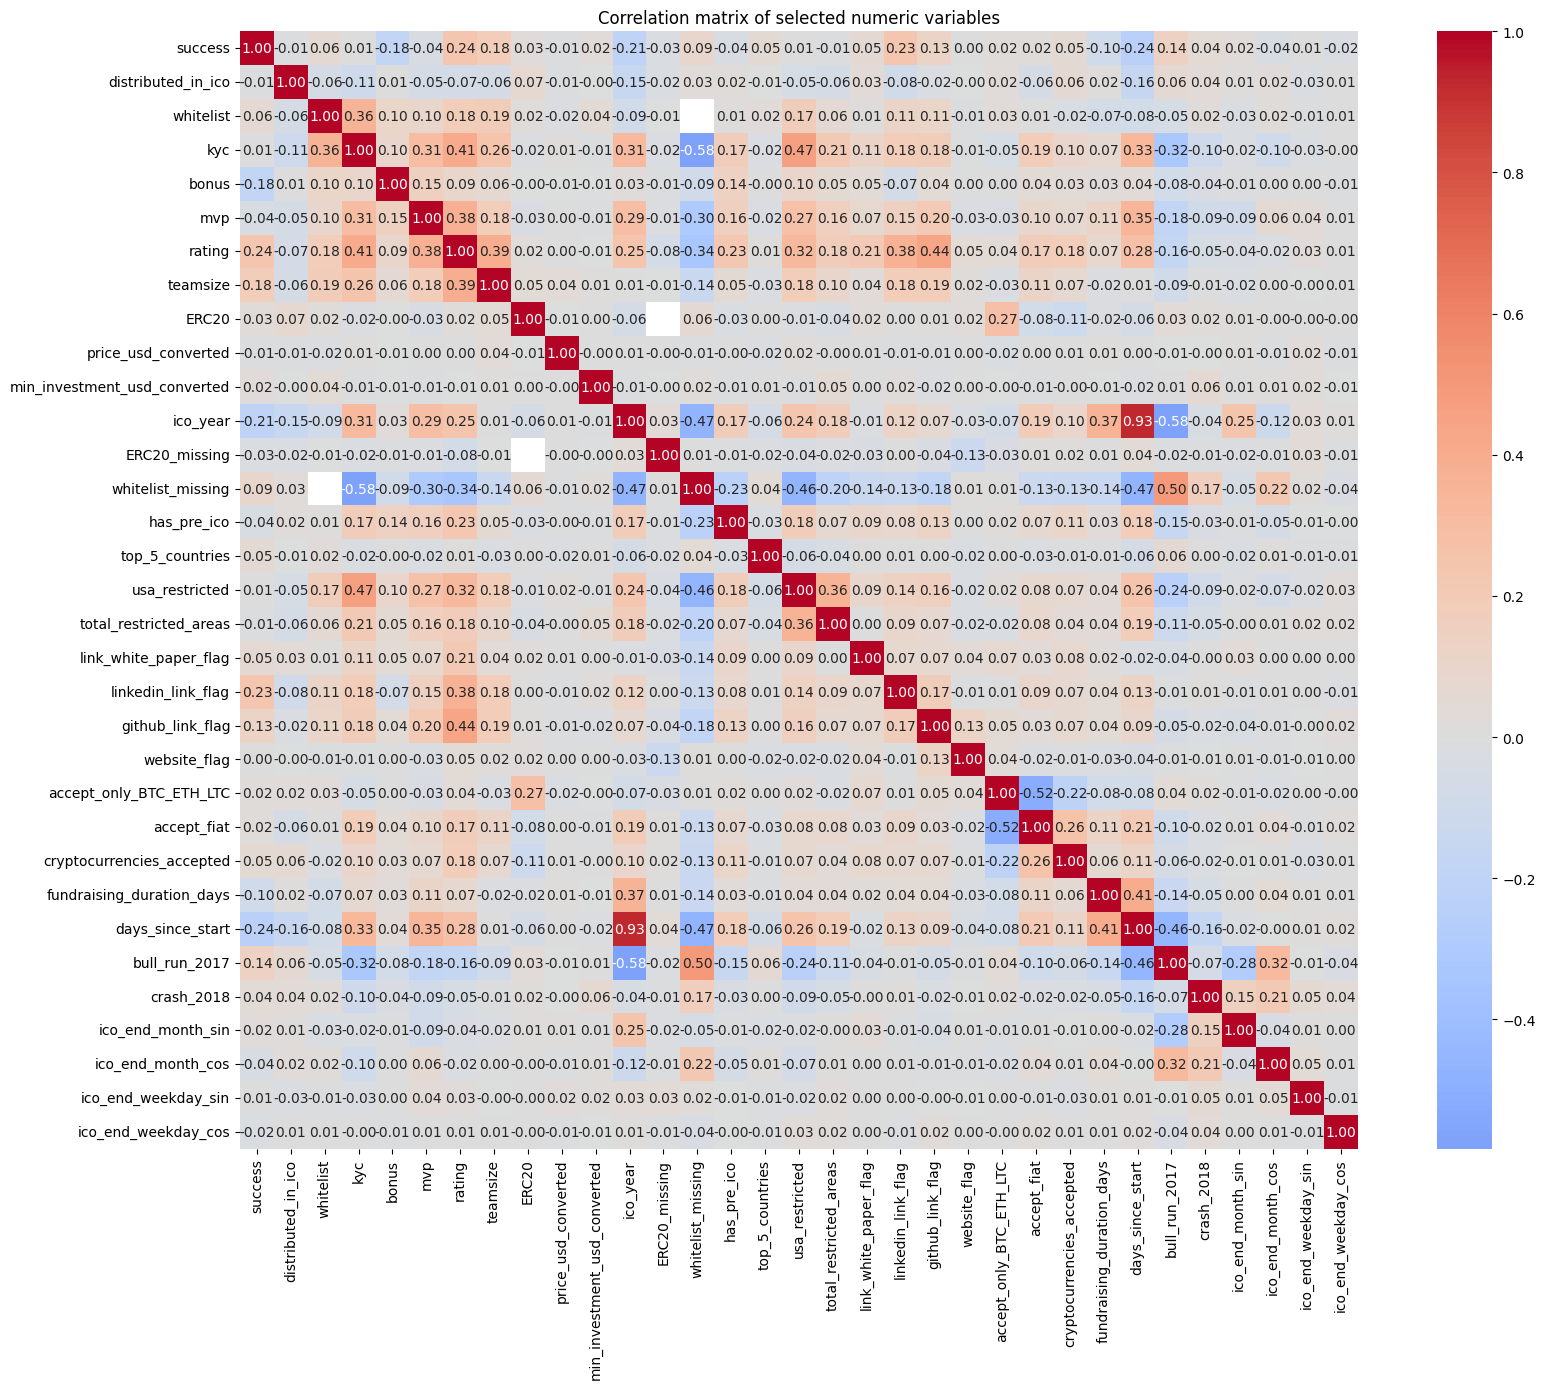

Highest absolute correlations (excluding the diagonal):


ico_year                 days_since_start           0.927829
days_since_start         ico_year                   0.927829
whitelist_missing        kyc                        0.583397
kyc                      whitelist_missing          0.583397
ico_year                 bull_run_2017              0.579671
bull_run_2017            ico_year                   0.579671
accept_only_BTC_ETH_LTC  accept_fiat                0.517659
accept_fiat              accept_only_BTC_ETH_LTC    0.517659
bull_run_2017            whitelist_missing          0.496796
whitelist_missing        bull_run_2017              0.496796
                         days_since_start           0.471514
days_since_start         whitelist_missing          0.471514
ico_year                 whitelist_missing          0.469893
whitelist_missing        ico_year                   0.469893
kyc                      usa_restricted             0.466458
usa_restricted           kyc                        0.466458
whitelist_missing       

In [1071]:
# Correlation analysis between all numeric columns in data_featuring

# Select only numeric columns
numeric_cols = data_featuring.select_dtypes(include=['number']).columns

# Exclude specific columns to avoid colinearity issues
exclude_cols = ['price_value', 'accept_only_BTC_ETH','accept_cryptos',
                'min_investment_value', 'pre_ico_price_value',
                'ico_end_month','ico_end_weekday']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]


# Compute the correlation matrix
corr_matrix = data_featuring[numeric_cols].corr()

# Show the correlation matrix as a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True)
plt.title('Correlation matrix of selected numeric variables')
plt.tight_layout()
plt.show()

# Optional: show the highest absolute correlations (excluding the diagonal)
corr_pairs = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool)).unstack().dropna()
corr_pairs = corr_pairs.abs().sort_values(ascending=False)
print("Highest absolute correlations (excluding the diagonal):")
display(corr_pairs[corr_pairs < 1].head(20))

### Descriptive statistical analysis of all columns in numeric_cols

In [1072]:
# Select only relevant numeric columns
stats = data_featuring[numeric_cols].describe().T

# Calculate additional values: skewness and kurtosis
stats['skew'] = data_featuring[numeric_cols].skew()
stats['kurtosis'] = data_featuring[numeric_cols].kurtosis()

# Add a column for missing values count
stats['missing'] = data_featuring[numeric_cols].isnull().sum()

# Round for better presentation
stats = stats.round(3)

# Display the summary table
display(stats)

# A table (markdown format)
print("\nMarkdown table:\n")
print(stats.to_markdown())


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,missing
success,5434.0,0.337137,0.472775,0.0,0.0,0.0,1.0,1.0,0.689,-1.526,0
distributed_in_ico,4151.0,0.53922,0.210643,0.0,0.4,0.55,0.7,1.0,-0.282,-0.383,1283
whitelist,3611.0,0.415397,0.492859,0.0,0.0,0.0,1.0,1.0,0.344,-1.883,1823
kyc,5434.0,0.42823,0.494868,0.0,0.0,0.0,1.0,1.0,0.29,-1.917,0
bonus,5434.0,0.075635,0.264437,0.0,0.0,0.0,0.0,1.0,3.211,8.312,0
mvp,5434.0,0.200037,0.400064,0.0,0.0,0.0,0.0,1.0,1.5,0.25,0
rating,5434.0,2.924696,0.761924,0.2,2.4,2.9,3.5,5.0,-0.108,-0.409,0
teamsize,3976.0,10.982646,7.243298,1.0,6.0,10.0,15.0,66.0,1.319,3.407,1458
ERC20,5408.0,0.871117,0.335102,0.0,1.0,1.0,1.0,1.0,-2.216,2.911,26
price_usd_converted,4904.0,249.186219,12594.790333,0.0,0.043,0.15,0.7,828486.022,60.781,3881.307,530



Markdown table:

|                              |   count |          mean |           std |         min |         25% |            50% |         75% |           max |   skew |   kurtosis |   missing |
|:-----------------------------|--------:|--------------:|--------------:|------------:|------------:|---------------:|------------:|--------------:|-------:|-----------:|----------:|
| success                      |    5434 |    0.337137   |     0.472775  |    0        |    0        |    0           |    1        |      1        |  0.689 |     -1.526 |         0 |
| distributed_in_ico           |    4151 |    0.53922    |     0.210643  |    0        |    0.4      |    0.55        |    0.7      |      1        | -0.282 |     -0.383 |      1283 |
| whitelist                    |    3611 |    0.415397   |     0.492859  |    0        |    0        |    0           |    1        |      1        |  0.344 |     -1.883 |      1823 |
| kyc                          |    5434 |    0.42823    |    

### handling missing values

In [1073]:
# # imputation of missing values
# for col in ['ERC20', 'bonus', 'mvp','kyc', 'whitelist']:
#     data_featuring[col].fillna(data_featuring[col].mode()[0], inplace=True)   # mode imputation

In [ ]:
# Elimina filas que tienen más de 5 valores nulos en las columnas 'numeric_cols'
# data_featuring = data_featuring.dropna(subset=numeric_cols, thresh=len(numeric_cols) - 20)

In [1075]:
# Select only relevant numeric columns
stats = data_featuring[numeric_cols].describe().T

# Calculate additional values: skewness and kurtosis
stats['skew'] = data_featuring[numeric_cols].skew()
stats['kurtosis'] = data_featuring[numeric_cols].kurtosis()

# Add a column for missing values count
stats['missing'] = data_featuring[numeric_cols].isnull().sum()

# Round for better presentation
stats = stats.round(3)

# Display the summary table
display(stats)


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,missing
success,5434.0,0.337137,0.472775,0.0,0.0,0.0,1.0,1.0,0.689,-1.526,0
distributed_in_ico,4151.0,0.53922,0.210643,0.0,0.4,0.55,0.7,1.0,-0.282,-0.383,1283
whitelist,3611.0,0.415397,0.492859,0.0,0.0,0.0,1.0,1.0,0.344,-1.883,1823
kyc,5434.0,0.42823,0.494868,0.0,0.0,0.0,1.0,1.0,0.29,-1.917,0
bonus,5434.0,0.075635,0.264437,0.0,0.0,0.0,0.0,1.0,3.211,8.312,0
mvp,5434.0,0.200037,0.400064,0.0,0.0,0.0,0.0,1.0,1.5,0.25,0
rating,5434.0,2.924696,0.761924,0.2,2.4,2.9,3.5,5.0,-0.108,-0.409,0
teamsize,3976.0,10.982646,7.243298,1.0,6.0,10.0,15.0,66.0,1.319,3.407,1458
ERC20,5408.0,0.871117,0.335102,0.0,1.0,1.0,1.0,1.0,-2.216,2.911,26
price_usd_converted,4904.0,249.186219,12594.790333,0.0,0.043,0.15,0.7,828486.022,60.781,3881.307,530


### export excel file with the new features

In [1076]:
# export excel file with the new features
data_featuring.to_excel('ico_data_featuring.xlsx', 
              index=False,              # Don't include index
              sheet_name='ICO Data',    # Name of the worksheet
              engine='openpyxl',        # Excel engine to use
              float_format="%.4f")      # Format for floating point numbers

## Modelling

In [1077]:
# Selection of relevant features for the model
# adjutst
print(numeric_cols)

df_model = data_featuring[numeric_cols +['country']].copy()
df_model.head()

['success', 'distributed_in_ico', 'whitelist', 'kyc', 'bonus', 'mvp', 'rating', 'teamsize', 'ERC20', 'price_usd_converted', 'min_investment_usd_converted', 'ico_year', 'ERC20_missing', 'whitelist_missing', 'has_pre_ico', 'top_5_countries', 'usa_restricted', 'total_restricted_areas', 'link_white_paper_flag', 'linkedin_link_flag', 'github_link_flag', 'website_flag', 'accept_only_BTC_ETH_LTC', 'accept_fiat', 'cryptocurrencies_accepted', 'fundraising_duration_days', 'days_since_start', 'bull_run_2017', 'crash_2018', 'ico_end_month_sin', 'ico_end_month_cos', 'ico_end_weekday_sin', 'ico_end_weekday_cos']


,success,distributed_in_ico,whitelist,kyc,bonus,mvp,rating,teamsize,ERC20,price_usd_converted,...,cryptocurrencies_accepted,fundraising_duration_days,days_since_start,bull_run_2017,crash_2018,ico_end_month_sin,ico_end_month_cos,ico_end_weekday_sin,ico_end_weekday_cos,country
0,1,0.5,1,1.0,1.0,1,4.0,NaN,1,0.01,...,2,143.0,4008.0,0,0,-2.449294e-16,1.000000,0.433884,-0.900969,India
1,0,0.6,0,1.0,0.0,1,4.8,14.0,1,0.10,...,2,152.0,4008.0,0,0,-2.449294e-16,1.000000,0.433884,-0.900969,Cyprus
2,1,0.5,0,0.0,1.0,1,4.5,14.0,1,0.14,...,3,671.0,4008.0,0,0,-2.449294e-16,1.000000,0.433884,-0.900969,UK
3,0,0.5,1,1.0,1.0,1,4.7,43.0,1,0.10,...,10,220.0,4039.0,0,0,5.000000e-01,0.866025,-0.781831,0.623490,UK
4,0,0.4,1,1.0,1.0,1,4.4,16.0,1,0.06,...,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,Seychelles


In [1078]:
# export excel file with df model
df_model.to_excel('df_model.xlsx', 
              index=False,              # Don't include index
              sheet_name='ICO Data',    # Name of the worksheet
              engine='openpyxl',        # Excel engine to use
              float_format="%.4f")      # Format for floating point numbers